In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%load_ext kedro.ipython

[08/17/23 18:15:14] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/17/23 18:15:15] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.                
                             py:126: DeprecationWarning: `kedro.extras.datasets` is deprecated and                 
                             will be removed in Kedro 0.19, install `kedro-datasets` instead by                    
                             running `pip install kedro-datasets`.                                                 
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

                    INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

[08/17/23 18:15:16] INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [3]:
catalog.layers

defaultdict(set,
            {'raw': {'hado_17',
              'hado_18',
              'hado_19',
              'hado_20',
              'hado_21',
              'hado_22'},
             'raw_preprocessing': {'hado_concat'},
             'raw_processing': {'hado_clean'},
             'intermediate_processing': {'hado_clean_na',
              'hado_replaced_words'},
             'final_processing': {'hado_cleaned',
              'hado_cleaned_medication',
              'hado_cleaned_sedation'},
             'model': {'hado_model'}})

In [4]:
df = catalog.load('hado_cleaned_medication')

[08/17/23 18:15:50] INFO     Loading data from 'hado_cleaned_medication' (CSVDataSet)...        data_catalog.py:345

Preview the dataset


In [5]:
df.shape

(4013, 43)

In [6]:
df.head()

h_procedencia s_procedencia  ap otros                  diagnostico  \
0   gil casares          upal  no    no                   cancer orl   
1       clinico     oncologia  no    no              melanoma vulvar   
2       clinico           mir  no    no          cancer broncogenico   
3       clinico     digestivo  no    no            cirrosis hepatica   
4       clinico     urgencias  no    no  neplasia de mama estadio IV   

                  motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0           control sintomas                si                   si     no   
1          mal control dolor                si                   no     no   
2          control evolutivo                si                   si     no   
3  administracion octreotido                no                   no     no   
4           control sintomas                si                   no     no   

  disnea  ... toracocentesis ayuntamiento fecha_alta  fe_iv tiene_sedacion  \
0     no  ...          vacio  desconocido    unknown  vacio              0   
1     no  ...          vacio  desconocido    unknown  vacio              0   
2     si  ...          vacio  desconocido    unknown  vacio              0   
3     no  ...          vacio  desconocido    unknown  vacio              0   
4     si  ...          vacio  desconocido    unknown  vacio              0   

   morfina  midazolam  buscapina  haloperidol levomepromazina  
0        0          0          0            0               0  
1        0          0          0            0               0  
2        0          0          0            0               0  
3        0          0          0            0               0  
4        0          0          0            0               0  

[5 rows x 43 columns]

View summary of dataset 📃

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   h_procedencia         4013 non-null   object
 1   s_procedencia         4013 non-null   object
 2   ap                    4013 non-null   object
 3   otros                 4013 non-null   object
 4   diagnostico           4013 non-null   object
 5   motivo_ing            4013 non-null   object
 6   paliativo_onc_noc     4013 non-null   object
 7   paliativo_no_onc_noc  4013 non-null   object
 8   fiebre                4013 non-null   object
 9   disnea                4013 non-null   object
 10  dolor                 4013 non-null   object
 11  delirium              4013 non-null   object
 12  otros_1               4013 non-null   object
 13  p_terminal            4013 non-null   object
 14  agonia                4013 non-null   object
 15  ps_ecog               4013 non-null   

In [8]:
df.describe().T

count         mean         std     min     25%     50%  \
ps_ecog          4013.0    16.589833   26.598380     0.0     0.0     0.0   
barthel          4013.0   335.279841  583.607228     0.0    20.0    40.0   
gds_fast         4013.0     7.840269   18.992604     0.0     0.0     0.0   
eva_ing          4013.0     2.365064   12.684001     0.0     0.0     0.0   
n_estancias      4013.0    14.981560   19.471153     0.0     4.0     9.0   
n_visitas        4013.0     6.008472    6.959248     0.0     2.0     4.0   
year             4013.0  2019.904062    1.786321  2017.0  2018.0  2020.0   
tiene_sedacion   4013.0     0.172689    0.378025     0.0     0.0     0.0   
morfina          4013.0     0.018191    0.133658     0.0     0.0     0.0   
midazolam        4013.0     0.017443    0.130932     0.0     0.0     0.0   
buscapina        4013.0     0.017194    0.130010     0.0     0.0     0.0   
haloperidol      4013.0     0.002741    0.052290     0.0     0.0     0.0   
levomepromazina  4013.0     0.001744    0.041734     0.0     0.0     0.0   

                    75%     max  
ps_ecog            34.0  1000.0  
barthel           600.0  5060.0  
gds_fast            0.0    70.0  
eva_ing             0.0   100.0  
n_estancias        18.0   304.0  
n_visitas           7.0    99.0  
year             2022.0  2022.0  
tiene_sedacion      0.0     1.0  
morfina             0.0     1.0  
midazolam           0.0     1.0  
buscapina           0.0     1.0  
haloperidol         0.0     1.0  
levomepromazina     0.0     1.0

In [9]:
df.describe(include=['object']).T

count unique                                  top  freq
h_procedencia         4013     16                              clinico  2240
s_procedencia         4013    100                                   no  1225
ap                    4013      8                                   no  2767
otros                 4013     41                                   no  3866
diagnostico           4013   1519  ITU (infeccion del tracto urinario)   172
motivo_ing            4013    560                     control sintomas  1229
paliativo_onc_noc     4013      4                                   no  2487
paliativo_no_onc_noc  4013      4                                   no  2888
fiebre                4013      4                                   no  3480
disnea                4013      3                                   no  2824
dolor                 4013      2                                   no  2559
delirium              4013      3                                   no  3351
otros_1               4013    162                                   no  3663
p_terminal            4013      3                                vacio  2466
agonia                4013      3                                   no  2450
otros_2               4013     52                          desconocido  2465
otros_complicaciones  4013    372                                   no  3431
sedacion              4013     26                                   no  3320
motivo_alta           4013     90                         fin cuidados  2380
medico                4013     14                     fernandez benito   797
ast_anorx             4013      2                                   no  2453
agudo_estable         4013      3                                   no  2030
cronico_reag          4013      4                                vacio  1550
trato_antibiotico     4013      3                                vacio  1550
transfusion           4013      4                                   no  2400
paracentesis          4013      3                                   no  2392
toracocentesis        4013      3                                   no  2458
ayuntamiento          4013     34                          desconocido  1551
fecha_alta            4013    213                              unknown  3253
fe_iv                 4013      3                                vacio  2959

Checking Nans in the Dataset:

In [10]:
df.isnull().sum()

h_procedencia           0
s_procedencia           0
ap                      0
otros                   0
diagnostico             0
motivo_ing              0
paliativo_onc_noc       0
paliativo_no_onc_noc    0
fiebre                  0
disnea                  0
dolor                   0
delirium                0
otros_1                 0
p_terminal              0
agonia                  0
ps_ecog                 0
barthel                 0
gds_fast                0
eva_ing                 0
otros_2                 0
otros_complicaciones    0
n_estancias             0
n_visitas               0
sedacion                0
motivo_alta             0
medico                  0
year                    0
ast_anorx               0
agudo_estable           0
cronico_reag            0
trato_antibiotico       0
transfusion             0
paracentesis            0
toracocentesis          0
ayuntamiento            0
fecha_alta              0
fe_iv                   0
tiene_sedacion          0
morfina     

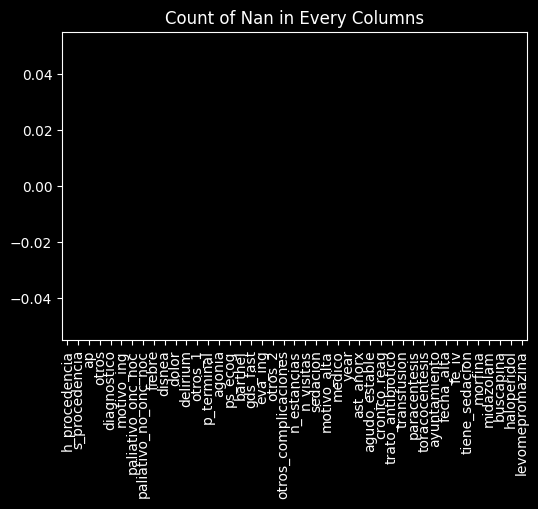

In [11]:
plt.figure(figsize=(6,4))
plt.title('Count of Nan in Every Columns')
df.isnull().sum().plot(kind='bar', color = "blue");

In [12]:
round(df.isnull().sum()/len(df)*100,2)

h_procedencia           0.0
s_procedencia           0.0
ap                      0.0
otros                   0.0
diagnostico             0.0
motivo_ing              0.0
paliativo_onc_noc       0.0
paliativo_no_onc_noc    0.0
fiebre                  0.0
disnea                  0.0
dolor                   0.0
delirium                0.0
otros_1                 0.0
p_terminal              0.0
agonia                  0.0
ps_ecog                 0.0
barthel                 0.0
gds_fast                0.0
eva_ing                 0.0
otros_2                 0.0
otros_complicaciones    0.0
n_estancias             0.0
n_visitas               0.0
sedacion                0.0
motivo_alta             0.0
medico                  0.0
year                    0.0
ast_anorx               0.0
agudo_estable           0.0
cronico_reag            0.0
trato_antibiotico       0.0
transfusion             0.0
paracentesis            0.0
toracocentesis          0.0
ayuntamiento            0.0
fecha_alta          

First we Analyze Numerical Data

In [13]:
num_data = df.select_dtypes(exclude=['object']).copy()
num_data.head()

ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
0       40      300         0        0           21         10  2017   
1       34        0         0        0           24          8  2017   
2       34      400         0        0           14          6  2017   
3       10      900         0        0            1          1  2017   
4       40      300         0       70            2          1  2017   

   tiene_sedacion  morfina  midazolam  buscapina  haloperidol  levomepromazina  
0               0        0          0          0            0                0  
1               0        0          0          0            0                0  
2               0        0          0          0            0                0  
3               0        0          0          0            0                0  
4               0        0          0          0            0                0

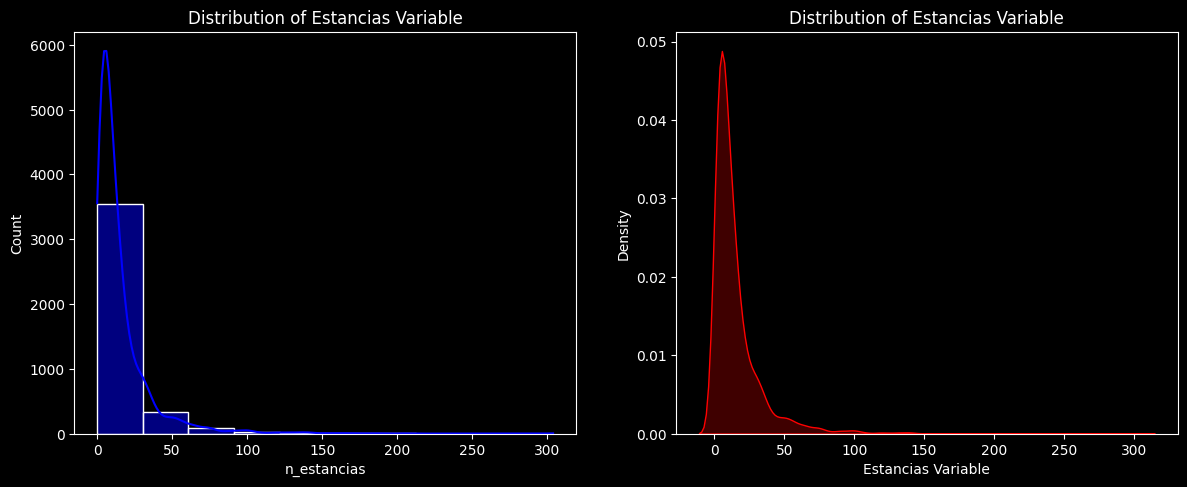

In [14]:
plt.figure(figsize=(22,24))
temp = num_data['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10, color= "blue", kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

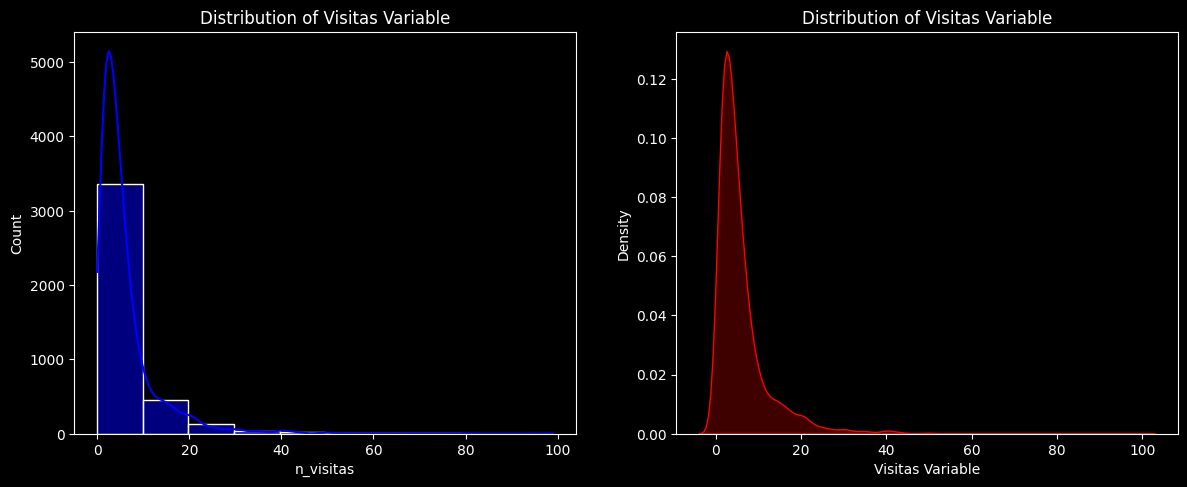

In [15]:
plt.figure(figsize=(22,24))
temp = num_data['n_visitas']
x = pd.Series(temp,name='Visitas Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Visitas Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Visitas Variable')
plt.show()

In [16]:
num_data['ps_ecog'].unique()

array([  40,   34,   10,    0,   12,   20,   30,   23,   70, 1000,  410],
      dtype=int64)

In [17]:
num_data[num_data['ps_ecog'] == 1000]

ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
1785     1000      100         0        0           18          5  2020   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
1785               0        0          0          0            0   

      levomepromazina  
1785                0

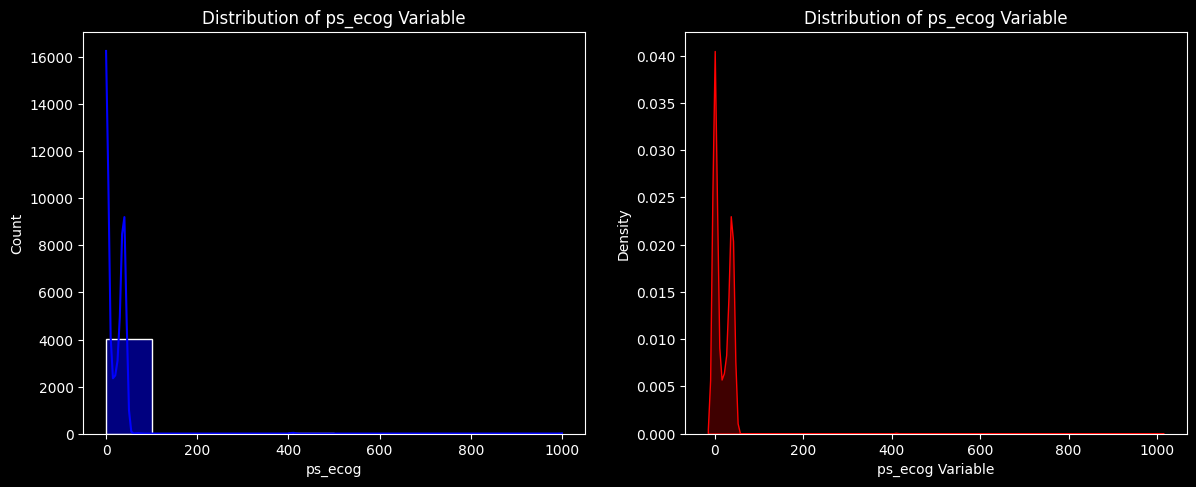

In [18]:
plt.figure(figsize=(22,24))
temp = num_data['ps_ecog']
x = pd.Series(temp,name='ps_ecog Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of ps_ecog Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of ps_ecog Variable')
plt.show()

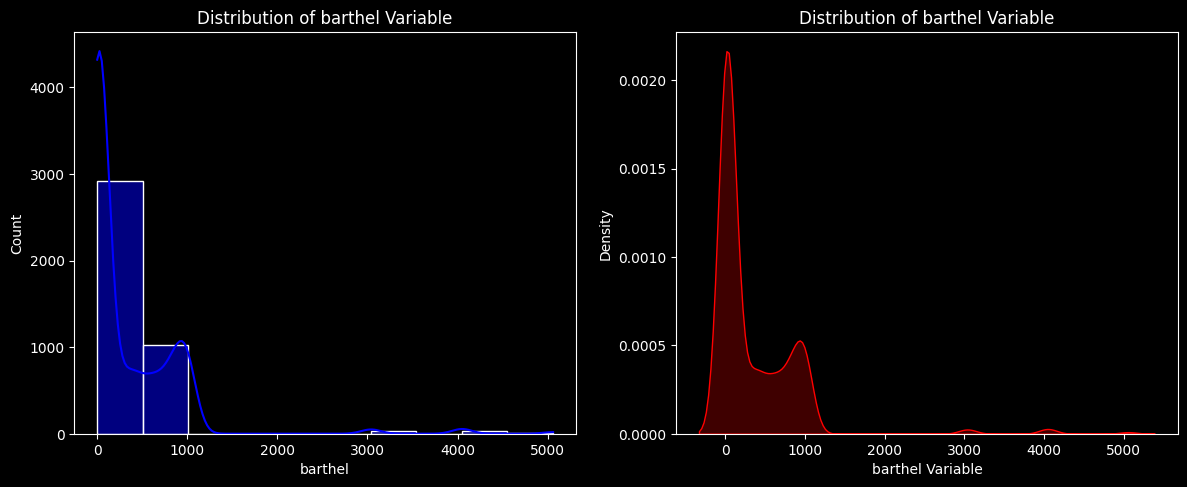

In [19]:
plt.figure(figsize=(22,24))
temp = num_data['barthel']
x = pd.Series(temp,name='barthel Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of barthel Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of barthel Variable')
plt.show()

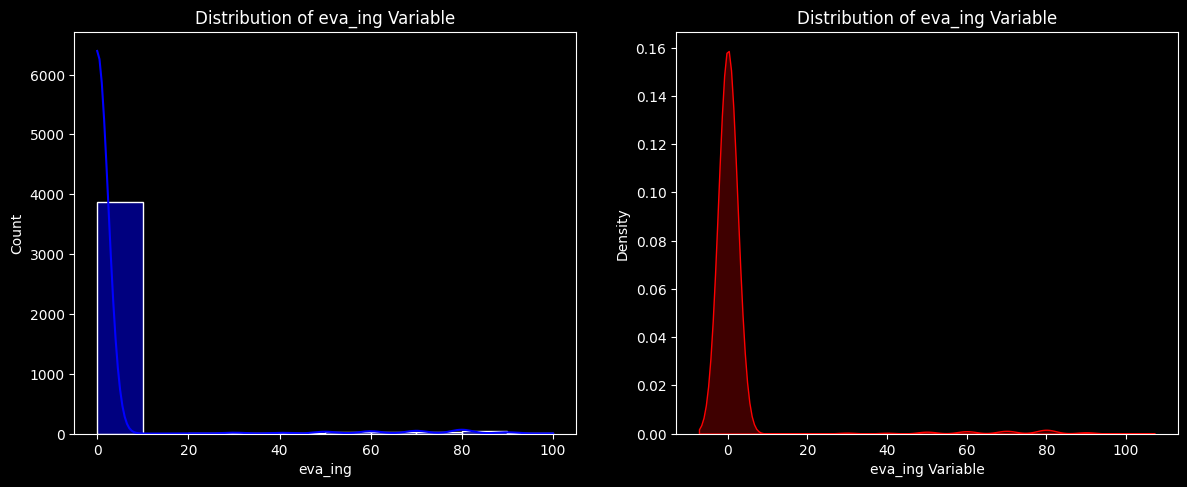

In [20]:
plt.figure(figsize=(22,24))
temp = num_data['eva_ing']
x = pd.Series(temp,name='eva_ing Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of eva_ing Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of eva_ing Variable')
plt.show()

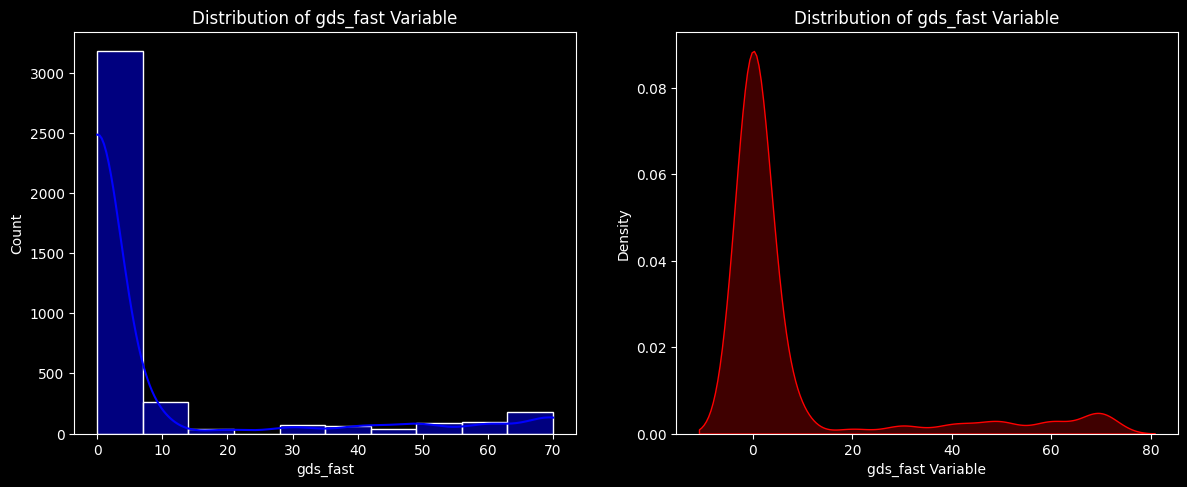

In [21]:
plt.figure(figsize=(22,24))
temp = num_data['gds_fast']
x = pd.Series(temp,name='gds_fast Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of gds_fast Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of gds_fast Variable')
plt.show()

Detect Outliers

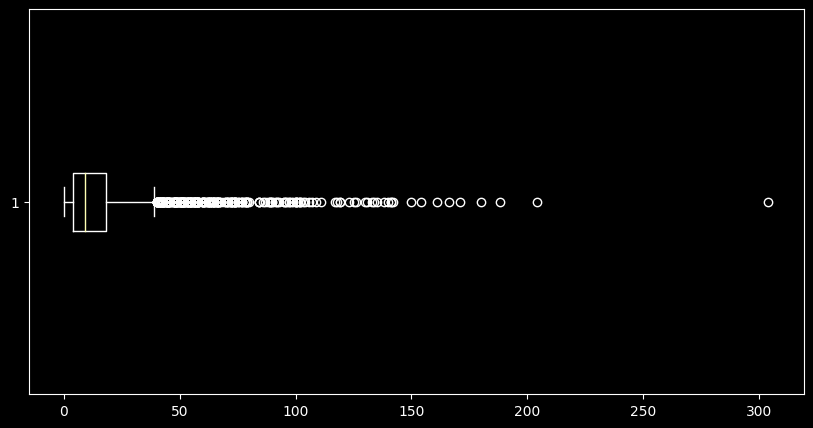

In [22]:
plt.figure(figsize=(10, 5))
plt.boxplot(num_data['n_estancias'],vert=False)
plt.show()

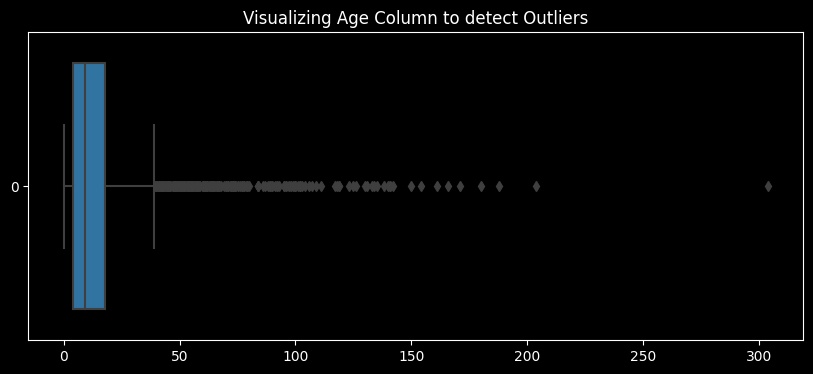

In [23]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(num_data['n_estancias'],color= "tab:blue", orient="h")
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

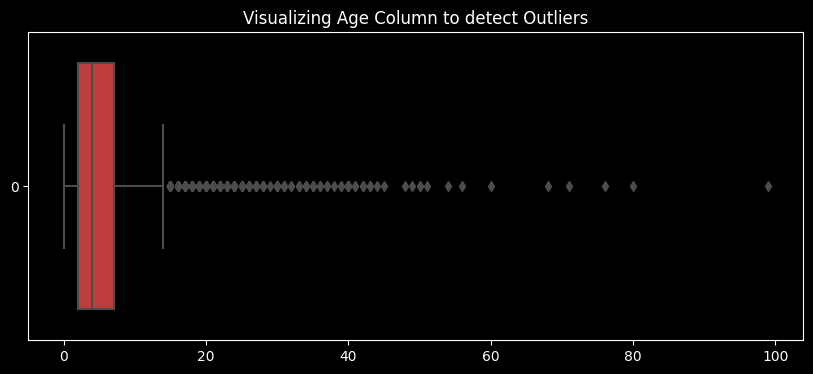

In [24]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(num_data['n_visitas'],color= "tab:red", orient="h")
ax.set_title('Visualizing Age Column to detect Outliers')
plt.show()

Deteccion de outliers con quantile

In [25]:
Q1 = num_data['n_estancias'].quantile(0.25)
print("Primer Cuartil", Q1,"\n")

Q3 = num_data['n_estancias'].quantile(0.75)
print("Tercer Cuartil", Q3,"\n")

IQR = Q3 -Q1
print("Rango Intercuartil", IQR,"\n")

Mediana = num_data['n_estancias'].median()
print("Mediana", Mediana,"\n")

Valor_min = num_data['n_estancias'].min()
print("Valor mínimo", Valor_min,"\n")

Valor_max = num_data['n_estancias'].max()
print("Valor máximo", Valor_max,"\n")


Primer Cuartil 4.0 

Tercer Cuartil 18.0 

Rango Intercuartil 14.0 

Mediana 9.0 

Valor mínimo 0 

Valor máximo 304 



In [26]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -17.0
BS_Calculado 
 39.0


Ubicación Outliers

In [27]:
ubicacion_outliers = (num_data['n_estancias'] < BI_Calculado) | (num_data['n_estancias'] > BS_Calculado)
print(f"\n Ubicación de Outliers \n{ubicacion_outliers}")


 Ubicación de Outliers 
0       False
1       False
2       False
3       False
4       False
        ...  
4008    False
4009    False
4010    False
4011    False
4012    False
Name: n_estancias, Length: 4013, dtype: bool


In [28]:
outliers = num_data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
21          0       20         0        0          103         21  2017   
24         34       60         0        0           69         31  2017   
58         40       20         0       90           92         40  2017   
61          0      600         0      100           49         14  2017   
106        40       10         0        0           98         35  2017   
...       ...      ...       ...      ...          ...        ...   ...   
3920       12      900         0        0           65         50  2022   
3936       40       20         0        0           79         39  2022   
3937       40      400         0        0           60         24  2022   
3949        0       30         0        0           42         16  2022   
3993       20      700         0        0          171         37  2022   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
21       

In [29]:
outliers_ordenados = outliers.sort_values("n_estancias")
outliers_ordenados

ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
2464       23      600         0        0           40          6  2021   
559        34     3040         0        0           40         14  2017   
373        40       20         0       80           40         16  2017   
3436        0      800         0        0           40         30  2022   
331        34       20         0        0           40         14  2017   
...       ...      ...       ...      ...          ...        ...   ...   
3993       20      700         0        0          171         37  2022   
789         0       20         0        0          180         40  2018   
3301       12        0         0        0          188         39  2022   
1972        0       40         0        0          204         51  2020   
735         0       50         0        0          304         60  2018   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
2464               0        0          0          0            0   
559                0        0          0          0            0   
373                1        1          1          1            0   
3436               0        0          0          0            0   
331                1        0          0          0            0   
...              ...      ...        ...        ...          ...   
3993               0        0          0          0            0   
789                0        0          0          0            0   
3301               1        0          0          0            0   
1972               0        0          0          0            0   
735                0        0          0          0            0   

      levomepromazina  
2464                0  
559                 0  
373                 0  
3436                0  
331                 0  
...               ...  
3993                0  
789                 0  
3301                0  
1972                0  
735                 0  

[294 rows x 13 columns]

In [30]:
ubicacion_sin_out = (num_data['n_estancias'] >= BI_Calculado) & (num_data['n_estancias'] <= BS_Calculado)
sin_out = num_data[ubicacion_sin_out]
sin_out

ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
0          40      300         0        0           21         10  2017   
1          34        0         0        0           24          8  2017   
2          34      400         0        0           14          6  2017   
3          10      900         0        0            1          1  2017   
4          40      300         0       70            2          1  2017   
...       ...      ...       ...      ...          ...        ...   ...   
4008       34       40         0        0           15          7  2022   
4009        0       30        40        0            6          4  2022   
4010       40       20         0        0           21          7  2022   
4011        0       20         7        0           11          3  2022   
4012       40        0         0        0           11          6  2022   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0                  0        0          0          0            0   
1                  0        0          0          0            0   
2                  0        0          0          0            0   
3                  0        0          0          0            0   
4                  0        0          0          0            0   
...              ...      ...        ...        ...          ...   
4008               1        0          0          0            0   
4009               0        0          0          0            0   
4010               0        0          0          0            0   
4011               1        0          0          0            0   
4012               1        0          0          0            0   

      levomepromazina  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
4008                0  
4009                0  
4010                0  
4011                0  
4012                0  

[3719 rows x 13 columns]

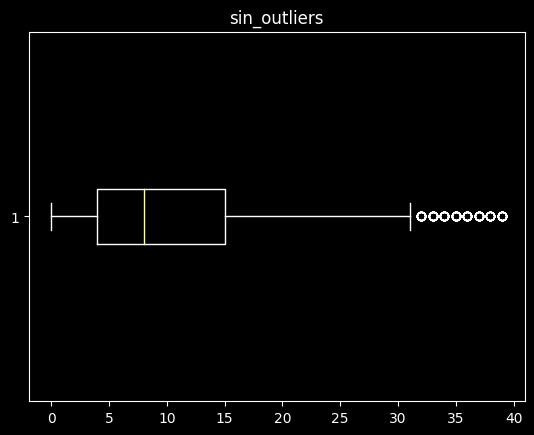

In [31]:
plt.title("sin_outliers")
plt.boxplot(sin_out["n_estancias"], vert=False)
plt.show();

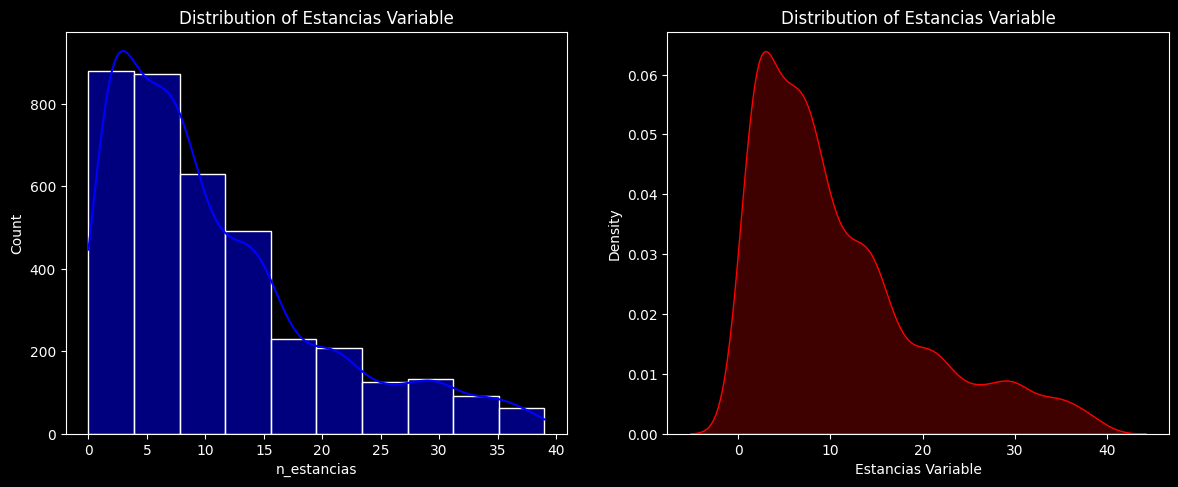

In [32]:
plt.figure(figsize=(22,24))
temp = sin_out['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

Repetir proceso hasta que no queden outliers

In [33]:
Q1 = num_data['n_visitas'].quantile(0.25)
print("Primer Cuartil", Q1,"\n")

Q3 = num_data['n_visitas'].quantile(0.75)
print("Tercer Cuartil", Q3,"\n")

IQR = Q3 -Q1
print("Rango Intercuartil", IQR,"\n")

Mediana = num_data['n_visitas'].median()
print("Mediana", Mediana,"\n")

Valor_min = num_data['n_visitas'].min()
print("Valor mínimo", Valor_min,"\n")

Valor_max = num_data['n_visitas'].max()
print("Valor máximo", Valor_max,"\n")


Primer Cuartil 2.0 

Tercer Cuartil 7.0 

Rango Intercuartil 5.0 

Mediana 4.0 

Valor mínimo 0 

Valor máximo 99 



In [34]:
BI_Calculado = (Q1 - 1.5 * IQR)
print("BI_Calculado \n", BI_Calculado)

BS_Calculado = (Q3 + 1.5 * IQR)
print("BS_Calculado \n", BS_Calculado)

BI_Calculado 
 -5.5
BS_Calculado 
 14.5


In [35]:
ubicacion_outliers = (num_data['n_visitas'] < BI_Calculado) | (num_data['n_visitas'] > BS_Calculado)
print("\n Ubicación de Outliers \n", ubicacion_outliers)


 Ubicación de Outliers 
 0       False
1       False
2       False
3       False
4       False
        ...  
4008    False
4009    False
4010    False
4011    False
4012    False
Name: n_visitas, Length: 4013, dtype: bool


In [36]:
outliers = num_data[ubicacion_outliers]
print("\n Lista de Outliers \n", outliers)


 Lista de Outliers 
       ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
21          0       20         0        0          103         21  2017   
24         34       60         0        0           69         31  2017   
26          0      400         0        0           33         15  2017   
58         40       20         0       90           92         40  2017   
69          0      400         0        0           35         18  2017   
...       ...      ...       ...      ...          ...        ...   ...   
3936       40       20         0        0           79         39  2022   
3937       40      400         0        0           60         24  2022   
3949        0       30         0        0           42         16  2022   
3993       20      700         0        0          171         37  2022   
3995       34      500         0        0           29         16  2022   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
21       

In [37]:
outliers_ordenados = outliers.sort_values("n_visitas")
outliers_ordenados

ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
2283        0       20        70        0           52         15  2021   
1630        0       20         0        0           20         15  2020   
3557       23      300         0        0           45         15  2022   
1569       40       10         0        0           18         15  2020   
3748        0      200         0        0           21         15  2022   
...       ...      ...       ...      ...          ...        ...   ...   
3115        0      600         0        0          166         68  2022   
2658       12      900         0        0           11         71  2021   
3021        0       70         0        0           23         76  2022   
3691        0      700         0        0          117         80  2022   
3340        0     1000         0        0            7         99  2022   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
2283               0        0          0          0            0   
1630               0        0          0          0            0   
3557               1        0          0          0            0   
1569               1        0          0          0            0   
3748               1        0          0          0            0   
...              ...      ...        ...        ...          ...   
3115               0        0          0          0            0   
2658               0        0          0          0            0   
3021               0        0          0          0            0   
3691               0        0          0          0            0   
3340               0        0          0          0            0   

      levomepromazina  
2283                0  
1630                0  
3557                0  
1569                0  
3748                0  
...               ...  
3115                0  
2658                0  
3021                0  
3691                0  
3340                0  

[355 rows x 13 columns]

Outliers con log

In [38]:
num_data_log = num_data.copy()
num_data_log

ps_ecog  barthel  gds_fast  eva_ing  n_estancias  n_visitas  year  \
0          40      300         0        0           21         10  2017   
1          34        0         0        0           24          8  2017   
2          34      400         0        0           14          6  2017   
3          10      900         0        0            1          1  2017   
4          40      300         0       70            2          1  2017   
...       ...      ...       ...      ...          ...        ...   ...   
4008       34       40         0        0           15          7  2022   
4009        0       30        40        0            6          4  2022   
4010       40       20         0        0           21          7  2022   
4011        0       20         7        0           11          3  2022   
4012       40        0         0        0           11          6  2022   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0                  0        0          0          0            0   
1                  0        0          0          0            0   
2                  0        0          0          0            0   
3                  0        0          0          0            0   
4                  0        0          0          0            0   
...              ...      ...        ...        ...          ...   
4008               1        0          0          0            0   
4009               0        0          0          0            0   
4010               0        0          0          0            0   
4011               1        0          0          0            0   
4012               1        0          0          0            0   

      levomepromazina  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
4008                0  
4009                0  
4010                0  
4011                0  
4012                0  

[4013 rows x 13 columns]

In [39]:
import numpy as np

# Asumiendo que df es tu DataFrame y 'columna' es la que quieres transformar
num_data_log['n_estancias'] = np.log(num_data_log['n_estancias'])
num_data_log['n_visitas'] = np.log(num_data_log['n_visitas'])
num_data_log['ps_ecog'] = np.log(num_data_log['ps_ecog'])
num_data_log['eva_ing'] = np.log(num_data_log['eva_ing'])
num_data_log['barthel'] = np.log(num_data_log['barthel'])
num_data_log['gds_fast'] = np.log(num_data_log['gds_fast'])
num_data_log


[08/17/23 18:16:21] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas\core\arraylik                
                             e.py:402: RuntimeWarning: divide by zero encountered in log                           
                               result = getattr(ufunc, method)(*inputs, **kwargs)                                  
                                                                                                                   

ps_ecog   barthel  gds_fast   eva_ing  n_estancias  n_visitas  year  \
0     3.688879  5.703782      -inf      -inf     3.044522   2.302585  2017   
1     3.526361      -inf      -inf      -inf     3.178054   2.079442  2017   
2     3.526361  5.991465      -inf      -inf     2.639057   1.791759  2017   
3     2.302585  6.802395      -inf      -inf     0.000000   0.000000  2017   
4     3.688879  5.703782      -inf  4.248495     0.693147   0.000000  2017   
...        ...       ...       ...       ...          ...        ...   ...   
4008  3.526361  3.688879      -inf      -inf     2.708050   1.945910  2022   
4009      -inf  3.401197  3.688879      -inf     1.791759   1.386294  2022   
4010  3.688879  2.995732      -inf      -inf     3.044522   1.945910  2022   
4011      -inf  2.995732  1.945910      -inf     2.397895   1.098612  2022   
4012  3.688879      -inf      -inf      -inf     2.397895   1.791759  2022   

      tiene_sedacion  morfina  midazolam  buscapina  haloperidol  \
0                  0        0          0          0            0   
1                  0        0          0          0            0   
2                  0        0          0          0            0   
3                  0        0          0          0            0   
4                  0        0          0          0            0   
...              ...      ...        ...        ...          ...   
4008               1        0          0          0            0   
4009               0        0          0          0            0   
4010               0        0          0          0            0   
4011               1        0          0          0            0   
4012               1        0          0          0            0   

      levomepromazina  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
4008                0  
4009                0  
4010                0  
4011                0  
4012                0  

[4013 rows x 13 columns]

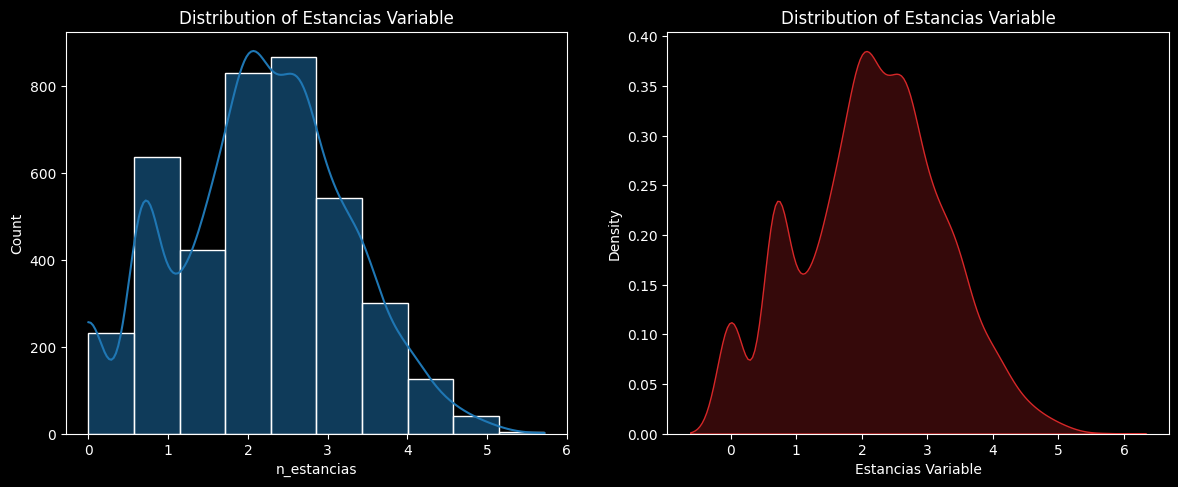

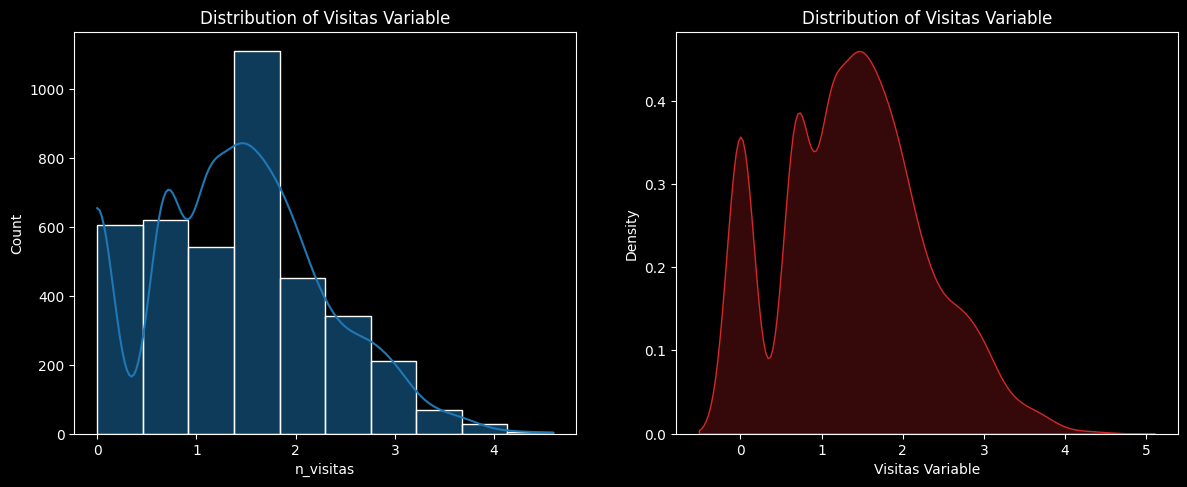

In [40]:
plt.figure(figsize=(22,24))
temp = num_data_log['n_estancias']
x = pd.Series(temp,name='Estancias Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Estancias Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "tab:red")
ax.set_title('Distribution of Estancias Variable')
plt.show()

plt.figure(figsize=(22,24))
temp = num_data_log['n_visitas']
x = pd.Series(temp,name='Visitas Variable')
plt.subplot(4,3,1)
ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
ax.set_title("Distribution of Visitas Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,fill=True,color= "tab:red")
ax.set_title('Distribution of Visitas Variable')
plt.show()

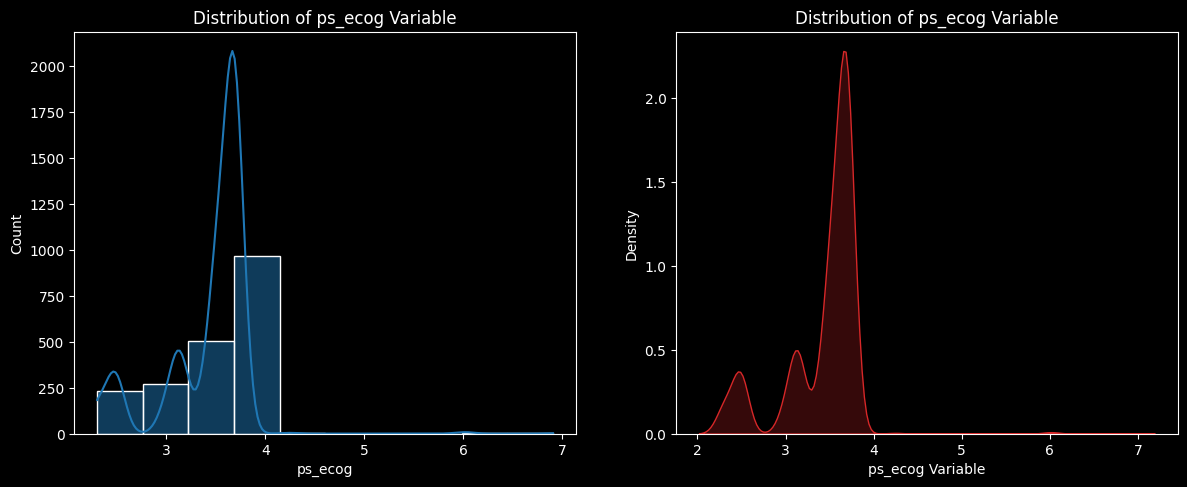

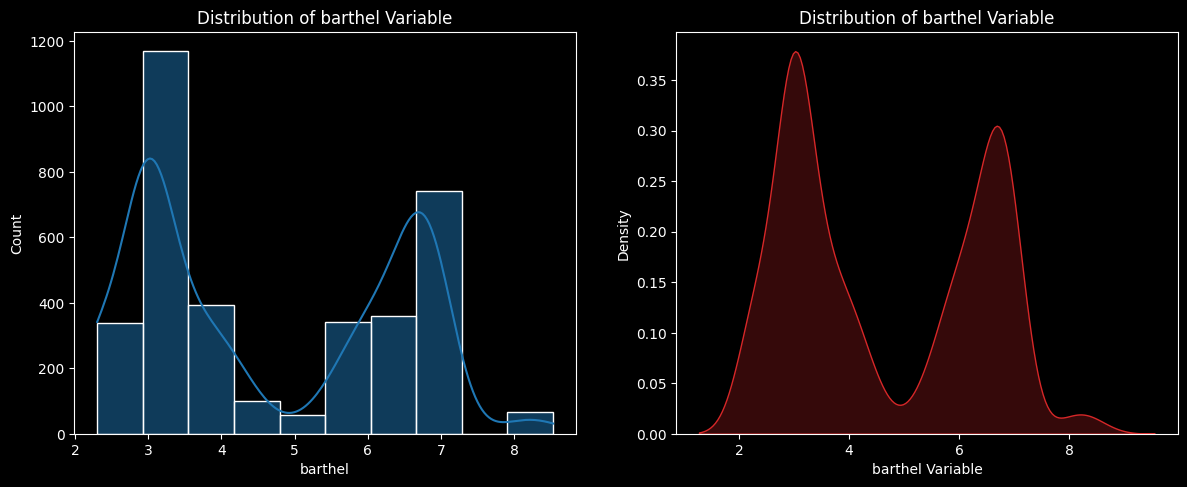

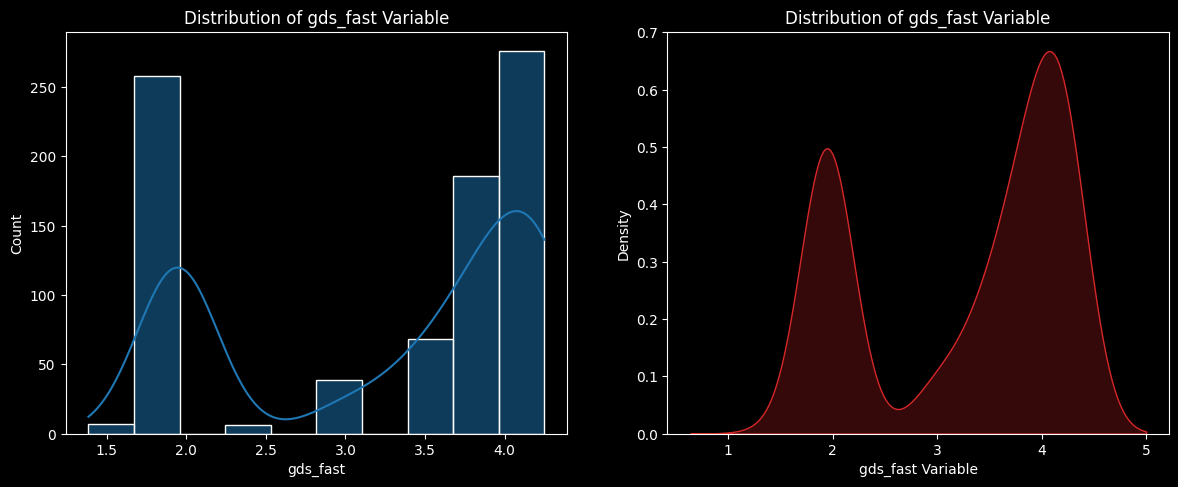

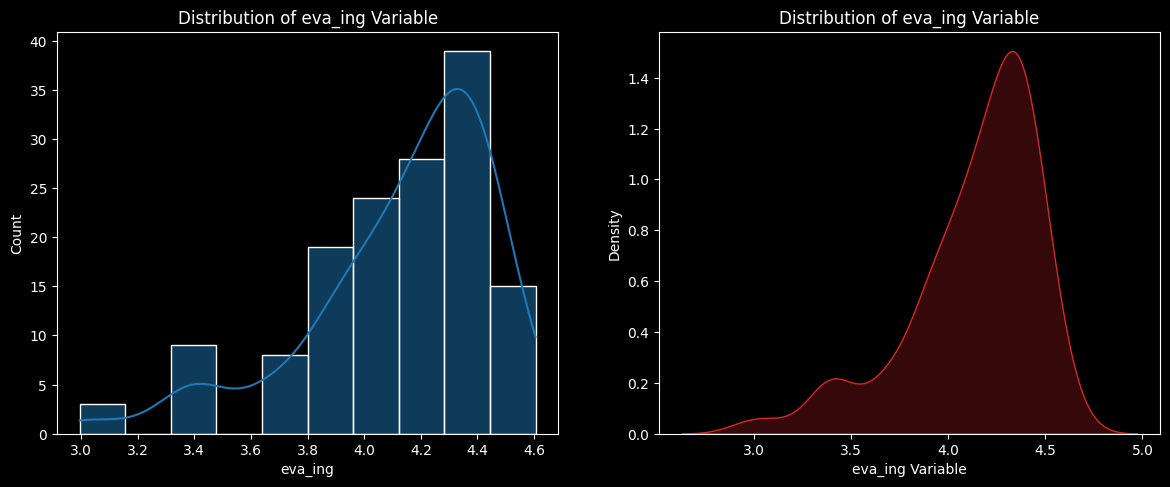

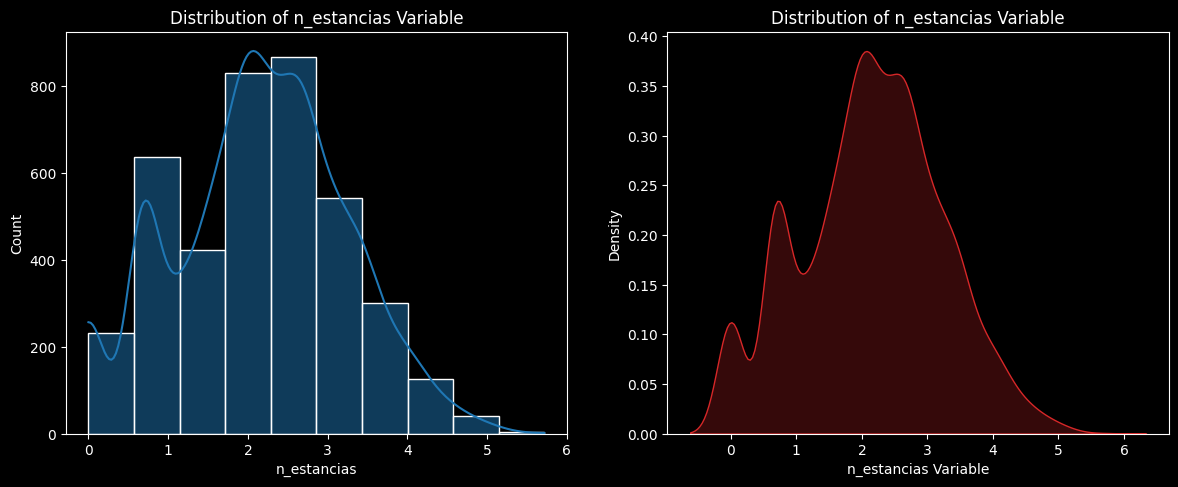

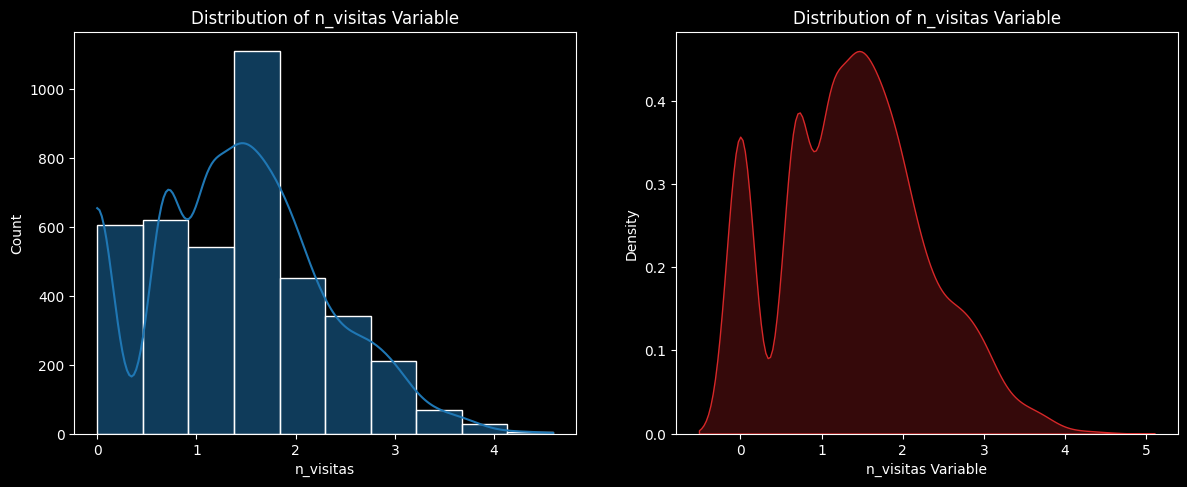

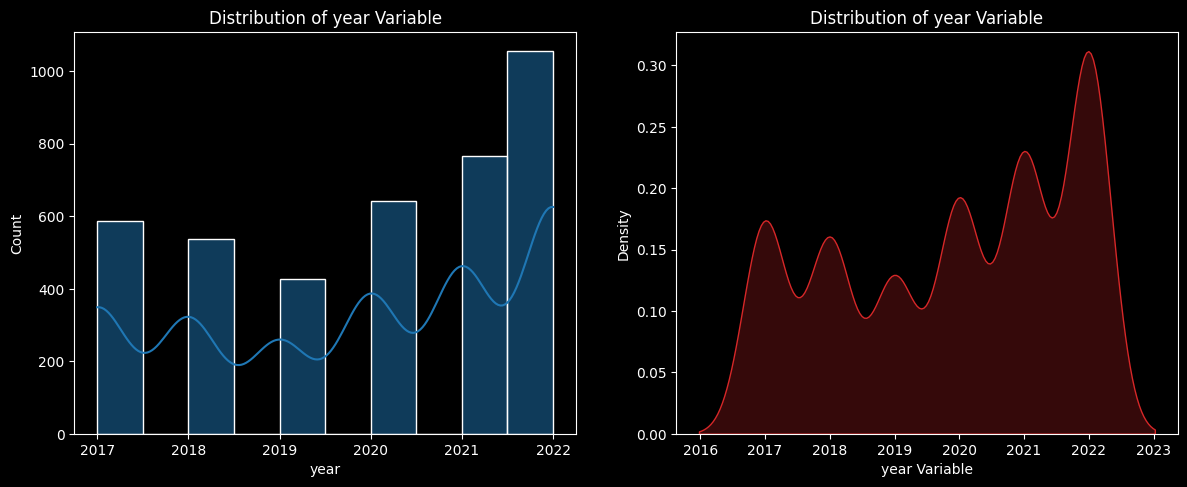

In [61]:
for col in num_data_log:
    temp = num_data_log[col]
    plt.figure(figsize=(22,24))
    x = pd.Series(temp,name=f'{col} Variable')
    plt.subplot(4,3,1)
    ax = sns.histplot(temp,bins=10,color= "tab:blue",kde=True,edgecolor='white', linewidth=1)
    ax.set_title(f"Distribution of {col} Variable")
    plt.subplot(4,3,2)
    ax = sns.kdeplot(x,fill=True,color= "tab:red")
    ax.set_title(f'Distribution of {col} Variable')
    plt.show()

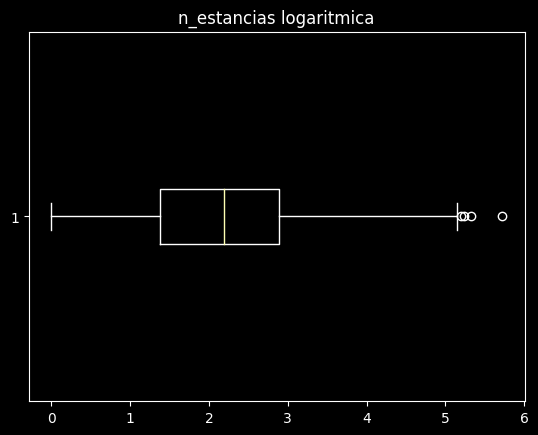

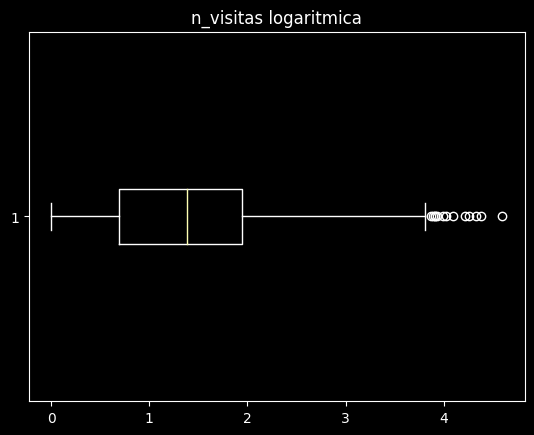

In [41]:
plt.title("n_estancias logaritmica")
plt.boxplot(num_data_log["n_estancias"], vert=False)
plt.show();
plt.title("n_visitas logaritmica")
plt.boxplot(num_data_log["n_visitas"], vert=False)
plt.show();

In [42]:
def unique_sorted_counts(df):
    for col in df:
        print(f"name column: {col}\n", df[col].value_counts(), "\n")
unique_sorted_counts(num_data)

name column: ps_ecog
 0       2044
40       963
34       408
23       213
12       162
30        93
10        69
20        54
410        4
70         2
1000       1
Name: ps_ecog, dtype: int64 

name column: barthel
 20      1011
0        446
10       339
1000     330
40       195
800      190
400      189
600      184
900      178
30       158
300      147
60       135
700       88
500       74
50        60
200       57
990       41
80        39
4050      30
70        29
3040      27
100       17
5060      10
90         8
650        7
450        6
350        5
95         2
120        2
850        2
99         2
45         1
35         1
980        1
950        1
250        1
Name: barthel, dtype: int64 

name column: gds_fast
 0     3173
7      257
70     148
60      94
50      85
40      63
30      63
20      39
45      38
67      31
10       6
34       5
5        5
56       3
4        2
6        1
Name: gds_fast, dtype: int64 

name column: eva_ing
 0      3868
80       38
70       

Now we Analyze Categorical Data

In [43]:
cat_data = df.select_dtypes(exclude=['int']).copy()
cat_data.head()

h_procedencia s_procedencia  ap otros                  diagnostico  \
0   gil casares          upal  no    no                   cancer orl   
1       clinico     oncologia  no    no              melanoma vulvar   
2       clinico           mir  no    no          cancer broncogenico   
3       clinico     digestivo  no    no            cirrosis hepatica   
4       clinico     urgencias  no    no  neplasia de mama estadio IV   

                  motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0           control sintomas                si                   si     no   
1          mal control dolor                si                   no     no   
2          control evolutivo                si                   si     no   
3  administracion octreotido                no                   no     no   
4           control sintomas                si                   no     no   

  disnea  ... ast_anorx agudo_estable cronico_reag trato_antibiotico  \
0     no  ...        si         vacio        vacio             vacio   
1     no  ...        si         vacio        vacio             vacio   
2     si  ...        no         vacio        vacio             vacio   
3     no  ...        no         vacio        vacio             vacio   
4     si  ...        no         vacio        vacio             vacio   

  transfusion paracentesis toracocentesis ayuntamiento fecha_alta  fe_iv  
0       vacio        vacio          vacio  desconocido    unknown  vacio  
1       vacio        vacio          vacio  desconocido    unknown  vacio  
2       vacio        vacio          vacio  desconocido    unknown  vacio  
3       vacio        vacio          vacio  desconocido    unknown  vacio  
4       vacio        vacio          vacio  desconocido    unknown  vacio  

[5 rows x 30 columns]

In [44]:
cat_data.isnull().sum()

h_procedencia           0
s_procedencia           0
ap                      0
otros                   0
diagnostico             0
motivo_ing              0
paliativo_onc_noc       0
paliativo_no_onc_noc    0
fiebre                  0
disnea                  0
dolor                   0
delirium                0
otros_1                 0
p_terminal              0
agonia                  0
otros_2                 0
otros_complicaciones    0
sedacion                0
motivo_alta             0
medico                  0
ast_anorx               0
agudo_estable           0
cronico_reag            0
trato_antibiotico       0
transfusion             0
paracentesis            0
toracocentesis          0
ayuntamiento            0
fecha_alta              0
fe_iv                   0
dtype: int64

In [45]:
# Frequency Distribution of the categorical column

cat_data.nunique()

h_procedencia             16
s_procedencia            100
ap                         8
otros                     41
diagnostico             1519
motivo_ing               560
paliativo_onc_noc          4
paliativo_no_onc_noc       4
fiebre                     4
disnea                     3
dolor                      2
delirium                   3
otros_1                  162
p_terminal                 3
agonia                     3
otros_2                   52
otros_complicaciones     372
sedacion                  26
motivo_alta               90
medico                    14
ast_anorx                  2
agudo_estable              3
cronico_reag               4
trato_antibiotico          3
transfusion                4
paracentesis               3
toracocentesis             3
ayuntamiento              34
fecha_alta               213
fe_iv                      3
dtype: int64

# Notes:

* Dataset has 7 (0.2%) duplicate rows	Duplicates
  
* `s_procedencia` has a **high cardinality**: 100 distinct values	**High cardinality**
* `diagnostico` has a **high cardinality**: 1519 distinct values	**High cardinality**
* `motivo_ing` has a **high cardinality**: 563 distinct values	**High cardinality**
* `otros_1` has a **high cardinality**: 162 distinct values	**High cardinality**
* `otros_2` has a **high cardinality**: 52 distinct values	**High cardinality**
* `otros_complicaciones` has a **high cardinality**: 372 distinct values	**High cardinality**
* `motivo_alta` has a **high cardinality**: 91 distinct values	**High cardinality**
* `fecha_alta` has a **high cardinality**: 213 distinct values	**High cardinality**
* `n_estancias` is highly overall correlated with n_visitas	**High correlation**
* `n_visitas` is highly overall correlated with n_estancias	**High correlation**
* `paliativo_onc_noc` is highly overall correlated with paliativo_no_onc_noc and 1 other fields	**High correlation**
* `paliativo_no_onc_noc` is highly overall correlated with paliativo_onc_noc and 1 other fields	**High correlation**
* `p_terminal` is highly overall correlated with otros_2 and 7 other fields	**High correlation**
* `agonia` is highly overall correlated with fe_iv	**High correlation**
* `eva_ing` is highly overall correlated with agudo_estable and 7 other fields	**High correlation**
* `otros_2` is highly overall correlated with p_terminal and 6 other fields	**High correlation**
* `agudo_estable` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `cronico_reag` is highly overall correlated with paliativo_onc_noc and 10 other fields	**High correlation**
* `trato_antibiotico` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `transfusion` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `paracentesis` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `toracocentesis` is highly overall correlated with p_terminal and 8 other fields	**High correlation**
* `ayuntamiento` is highly overall correlated with p_terminal and 7 other fields	**High correlation**
* `fe_iv` is highly overall correlated with agonia and 1 other fields	**High correlation**
* `h_procedencia` is highly **imbalance**d (61.0%)	**Imbalance**
* `ap` is highly **imbalance**d (69.3%)	**Imbalance**
* `otros` is highly **imbalance**d (93.1%)	**Imbalance**
* `paliativo_onc_noc` is highly **imbalance**d (51.8%)	**Imbalance**
* `paliativo_no_onc_noc` is highly **imbalance**d (56.8%)	**Imbalance**
* `fiebre` is highly **imbalance**d (71.4%)	**Imbalance**
* `delirium` is highly **imbalance**d (59.1%)	**Imbalance**
* `otros_1` is highly **imbalance**d (86.4%)	**Imbalance**
* `gds_fast` is highly **imbalance**d (68.1%)	**Imbalance**
* `eva_ing` is highly **imbalance**d (80.5%)	**Imbalance**
* `otros_2` is highly **imbalance**d (79.9%)	**Imbalance**
* `otros_complicaciones` is highly **imbalance**d (79.3%)	**Imbalance**
* `sedacion` is highly **imbalance**d (82.5%)	**Imbalance**
* `motivo_alta` is highly **imbalance**d (63.9%)	**Imbalance**
* `fecha_alta` is highly **imbalance**d (72.7%)	**Imbalance**
* `eva_ing has` 2465 (61.4%) missing values	Missing

In [27]:
# # Agrupar columnas otros en una sola
# df['otros'] = df[['otros_complicaciones', 'otros_2', 'otros_1', 'otros']].apply(
#     lambda row: ' '.join([str(val) for val in row if pd.notnull(val) and str(val)!='']), axis=1
# )

# # Si quieres eliminar las columnas originales después de combinarlas
# df = df.drop(columns=['otros_complicaciones', 'otros_2', 'otros_1'])

In [28]:
# df['otros'].unique()

# 1.Frecuency Analysis

In [46]:
for col in cat_data.columns:
    print(cat_data[col].value_counts())

clinico                 2240
no                      1251
conxo                    329
gil casares              157
provincial                12
chuac                      6
residencia                 5
si                         3
rosaleda                   3
hula                       1
salnes                     1
ap                         1
san rafael la coruna       1
quiron la coruna           1
lucus augusti              1
pontevedra                 1
Name: h_procedencia, dtype: int64
no                              1225
oncologia                        538
mir                              483
urgencias                        415
upal                             208
                                ... 
consultas externas oncologia       1
mir gil                            1
enfermedad infecciosas             1
respiratorio                       1
utab                               1
Name: s_procedencia, Length: 100, dtype: int64
no                  2767
si                  123

In [47]:
[(col, df[col].value_counts()) for col in df]

[('h_procedencia',
  clinico                 2240
  no                      1251
  conxo                    329
  gil casares              157
  provincial                12
  chuac                      6
  residencia                 5
  si                         3
  rosaleda                   3
  hula                       1
  salnes                     1
  ap                         1
  san rafael la coruna       1
  quiron la coruna           1
  lucus augusti              1
  pontevedra                 1
  Name: h_procedencia, dtype: int64),
 ('s_procedencia',
  no                              1225
  oncologia                        538
  mir                              483
  urgencias                        415
  upal                             208
                                  ... 
  consultas externas oncologia       1
  mir gil                            1
  enfermedad infecciosas             1
  respiratorio                       1
  utab                               1

In [48]:
for col in cat_data:
    print(round(cat_data[col].value_counts()/len(cat_data[col]),3))

clinico                 0.558
no                      0.312
conxo                   0.082
gil casares             0.039
provincial              0.003
chuac                   0.001
residencia              0.001
si                      0.001
rosaleda                0.001
hula                    0.000
salnes                  0.000
ap                      0.000
san rafael la coruna    0.000
quiron la coruna        0.000
lucus augusti           0.000
pontevedra              0.000
Name: h_procedencia, dtype: float64
no                              0.305
oncologia                       0.134
mir                             0.120
urgencias                       0.103
upal                            0.052
                                ...  
consultas externas oncologia    0.000
mir gil                         0.000
enfermedad infecciosas          0.000
respiratorio                    0.000
utab                            0.000
Name: s_procedencia, Length: 100, dtype: float64
no               

## 1.1Visualización de las frecuencias

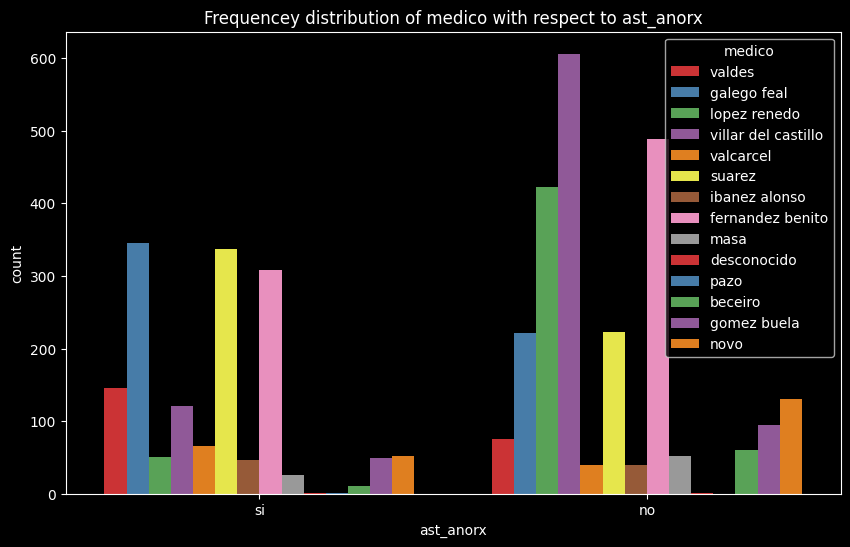

In [49]:
f , ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='ast_anorx',hue='medico',data=cat_data,palette='Set1')
ax.set_title('Frequencey distribution of medico with respect to ast_anorx')
plt.show()

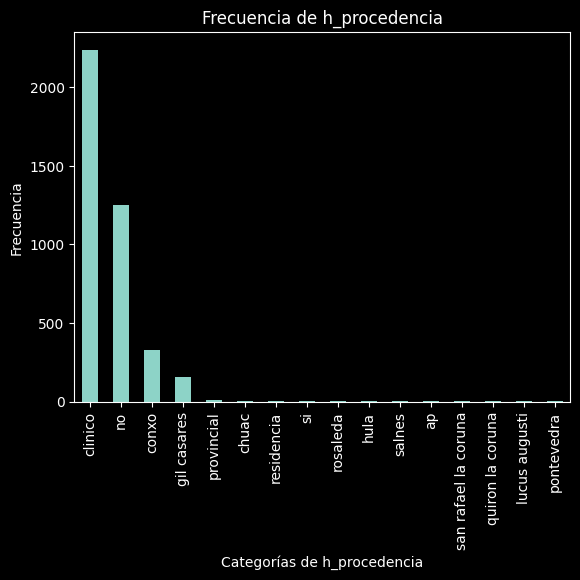

In [50]:
df['h_procedencia'].value_counts().plot(kind='bar')
plt.title('Frecuencia de h_procedencia')
plt.xlabel('Categorías de h_procedencia')
plt.ylabel('Frecuencia')
plt.show()

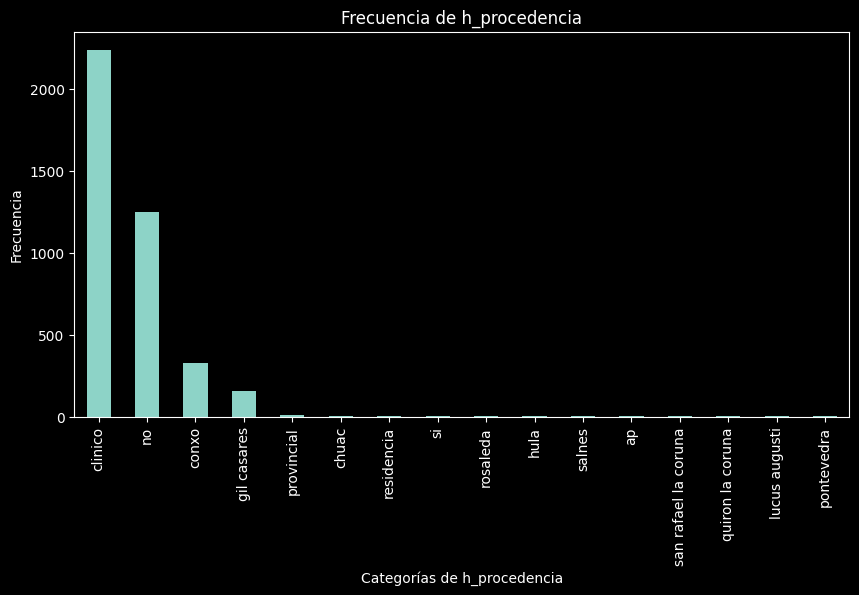

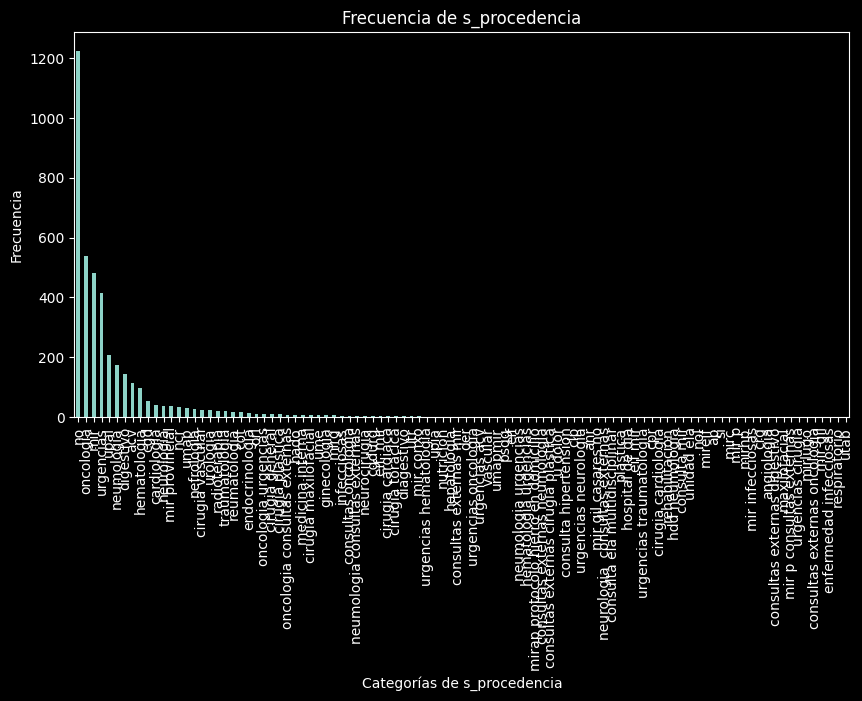

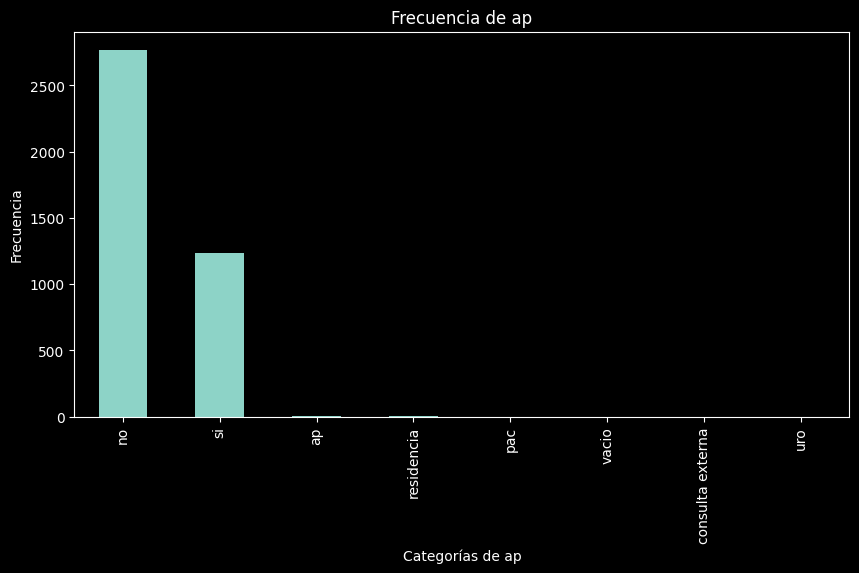

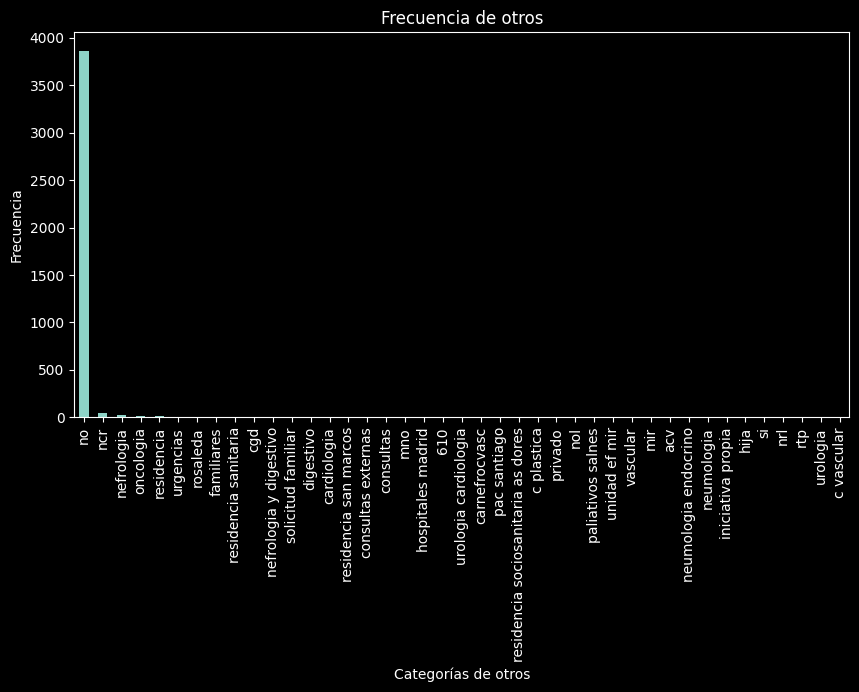

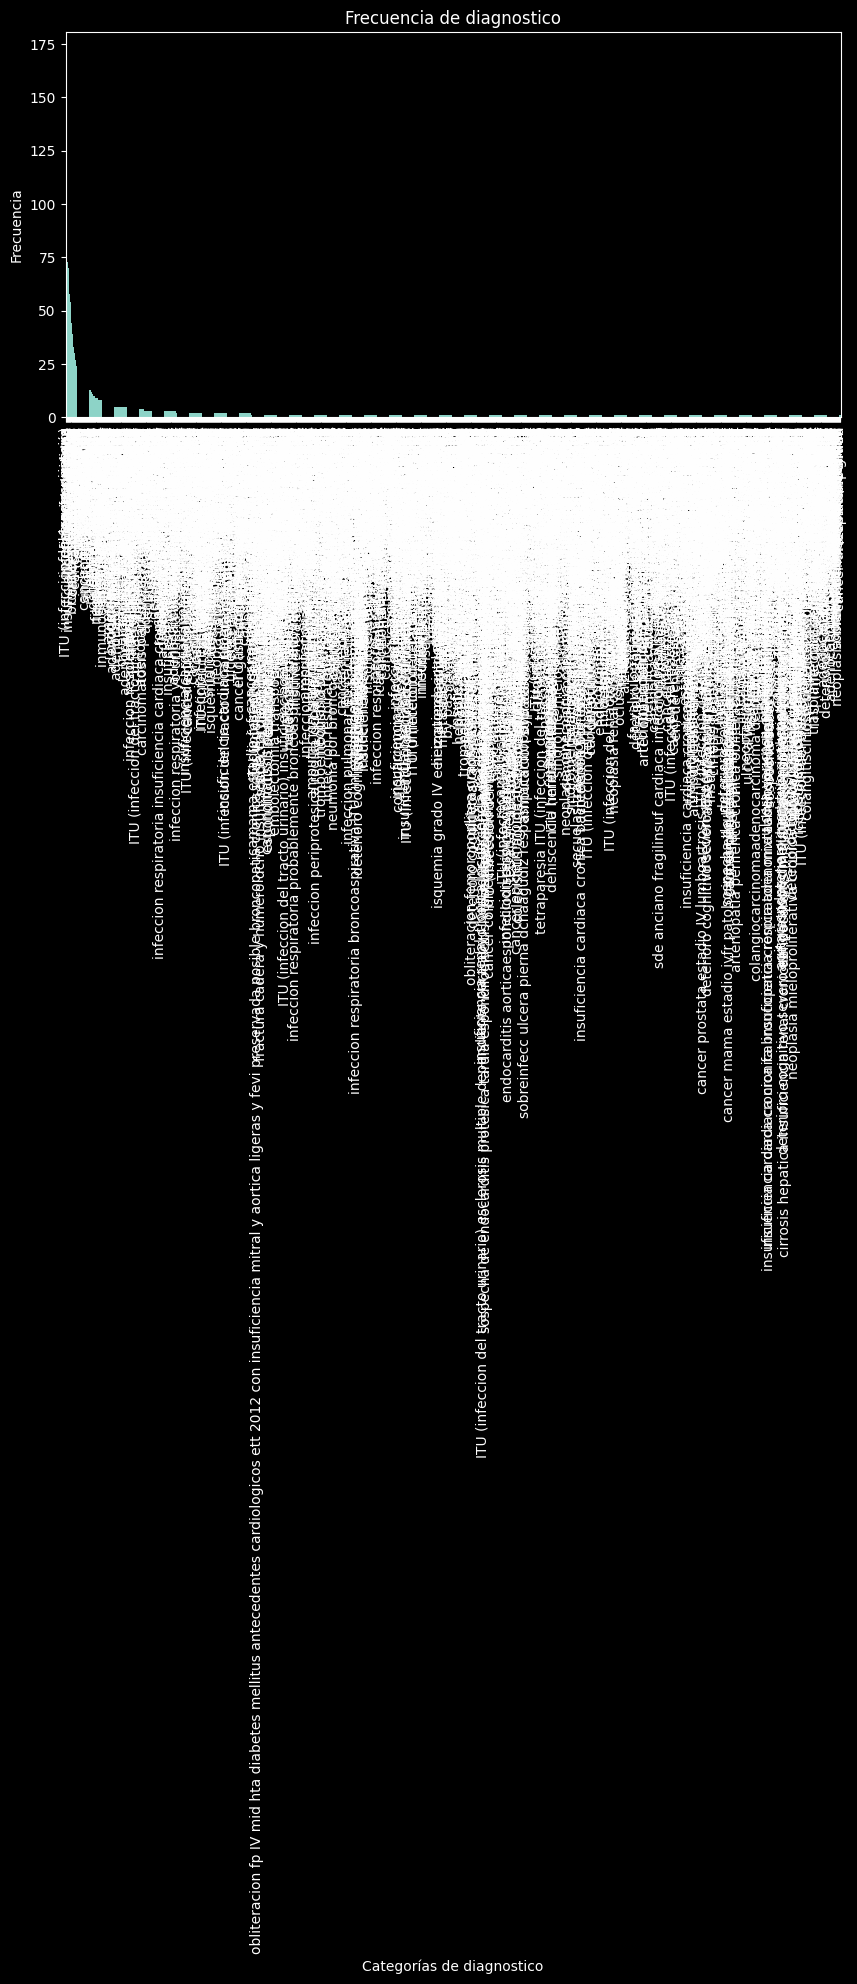

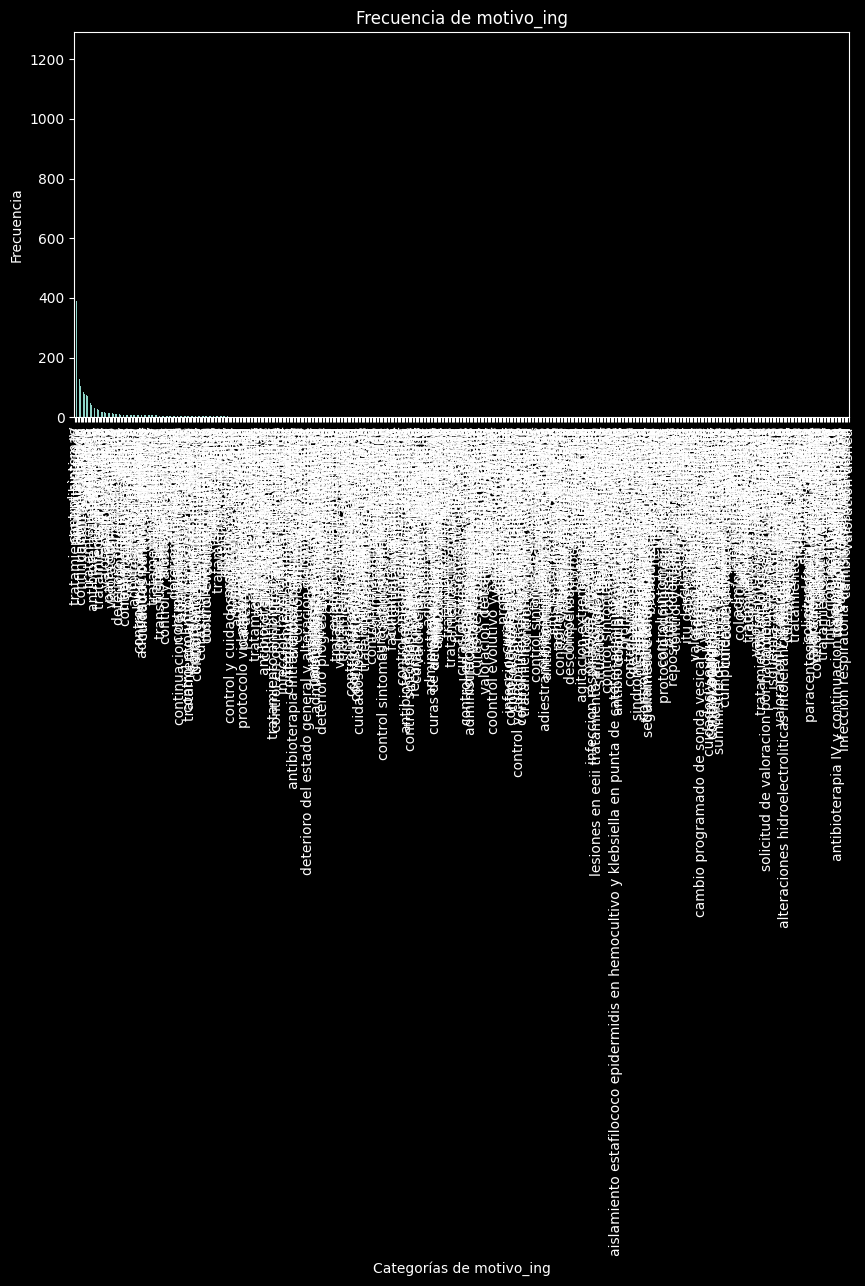

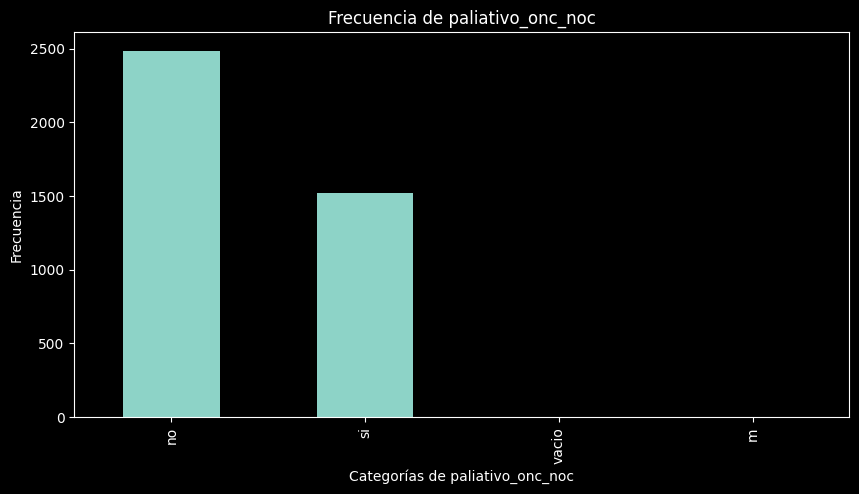

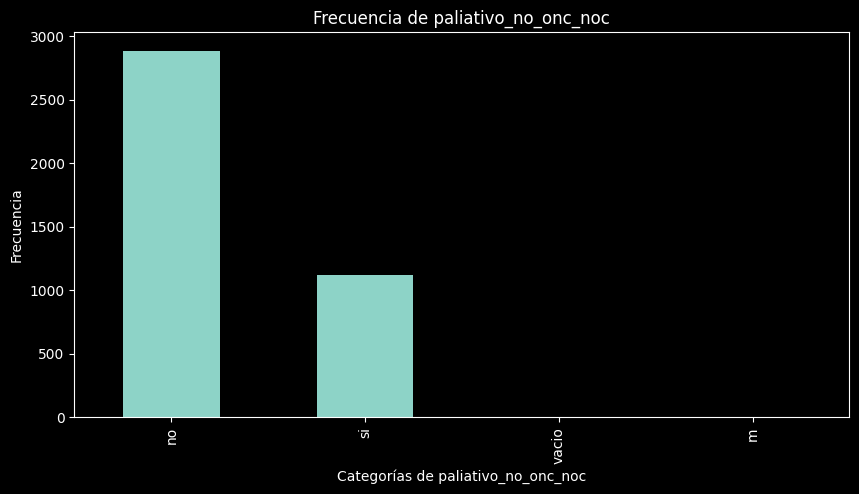

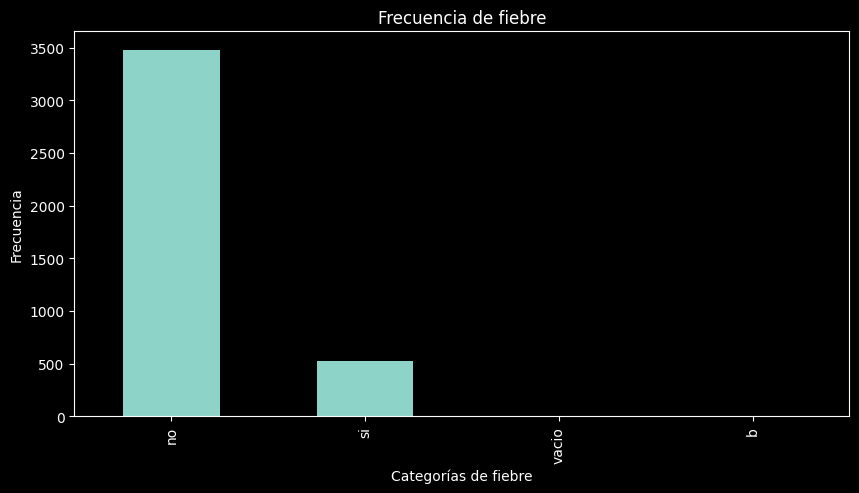

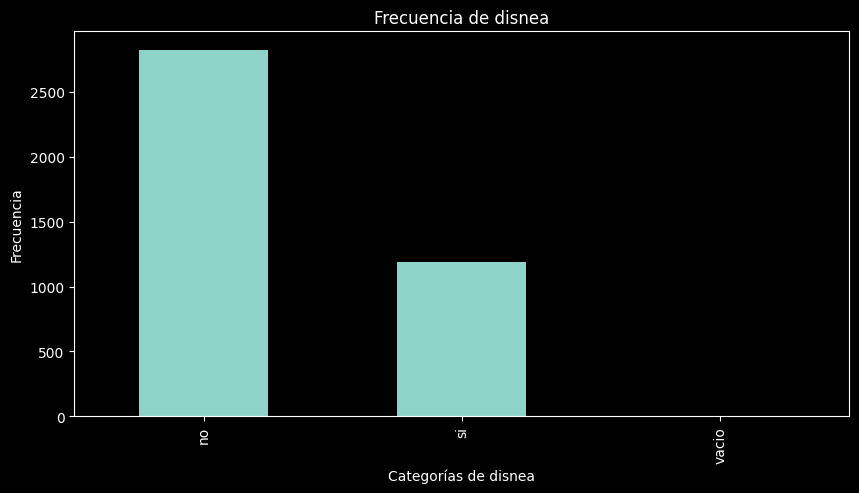

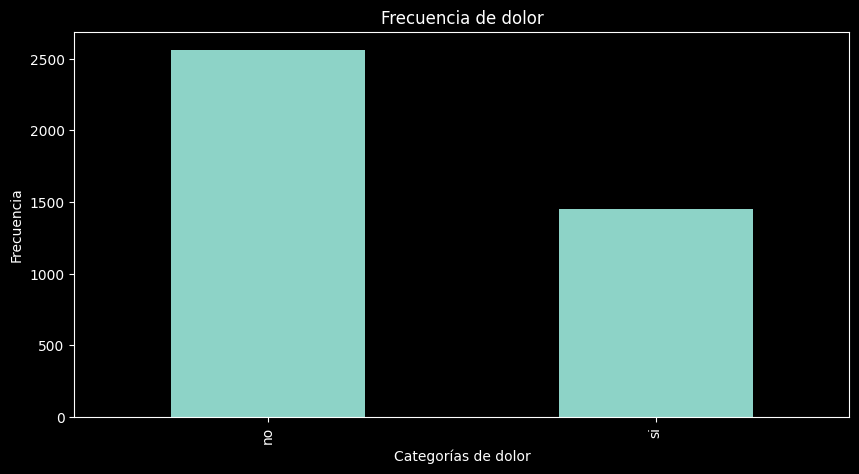

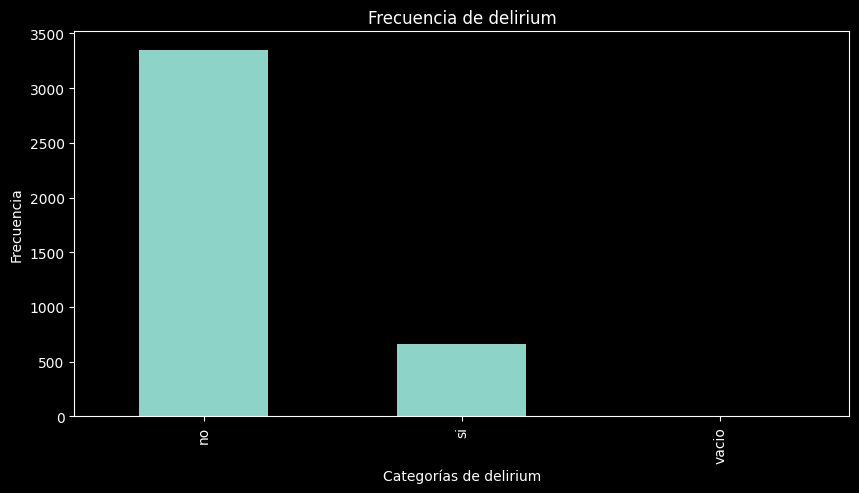

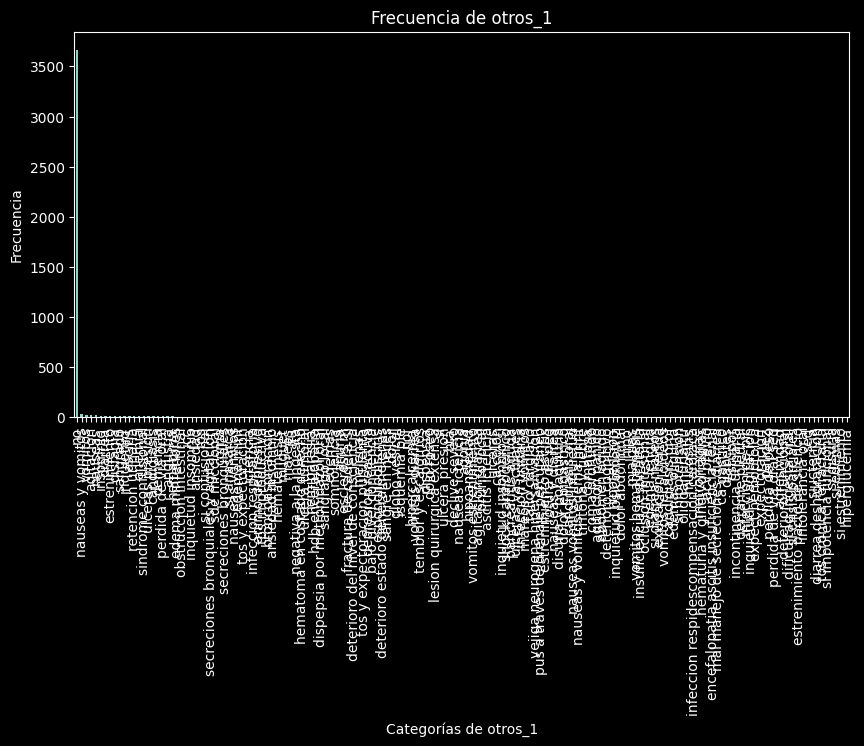

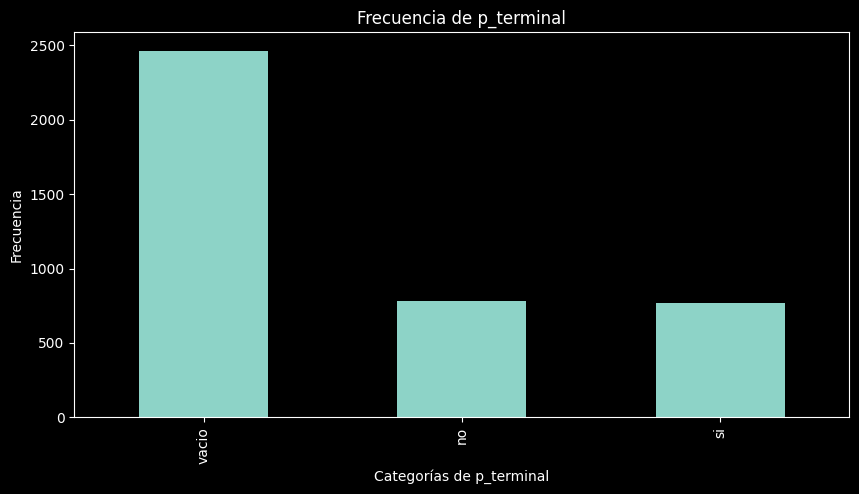

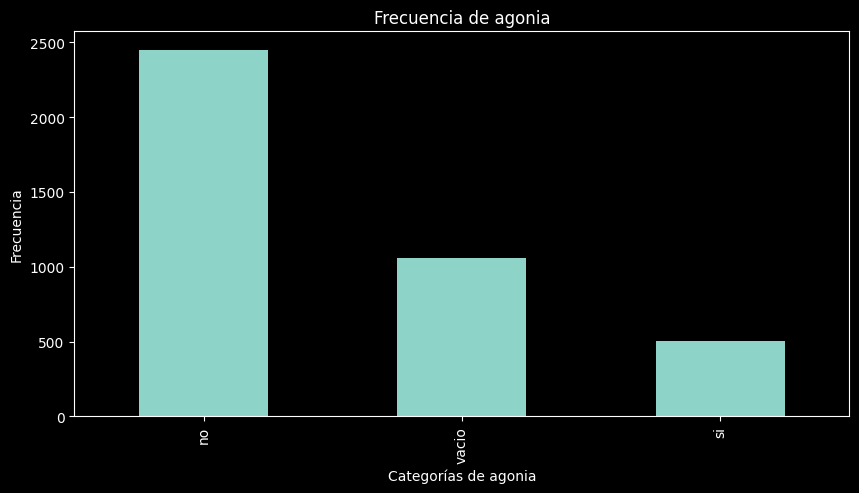

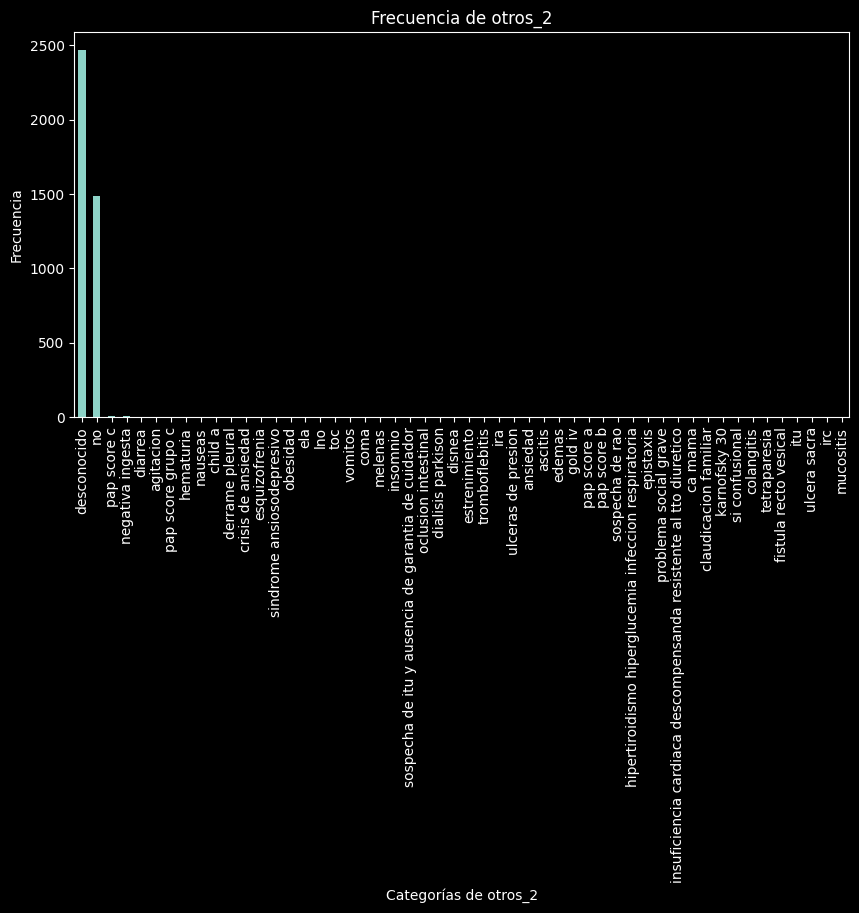

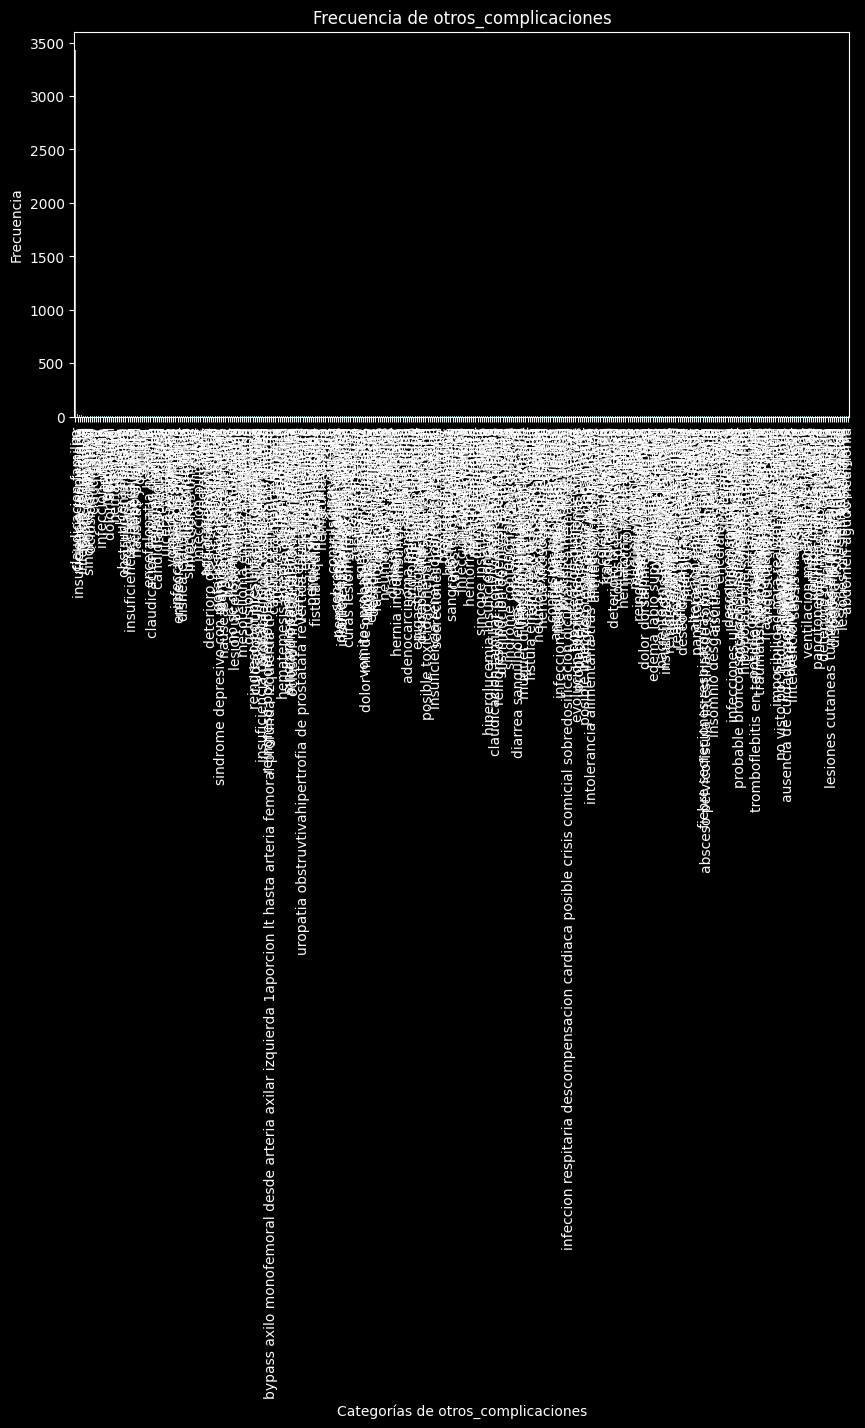

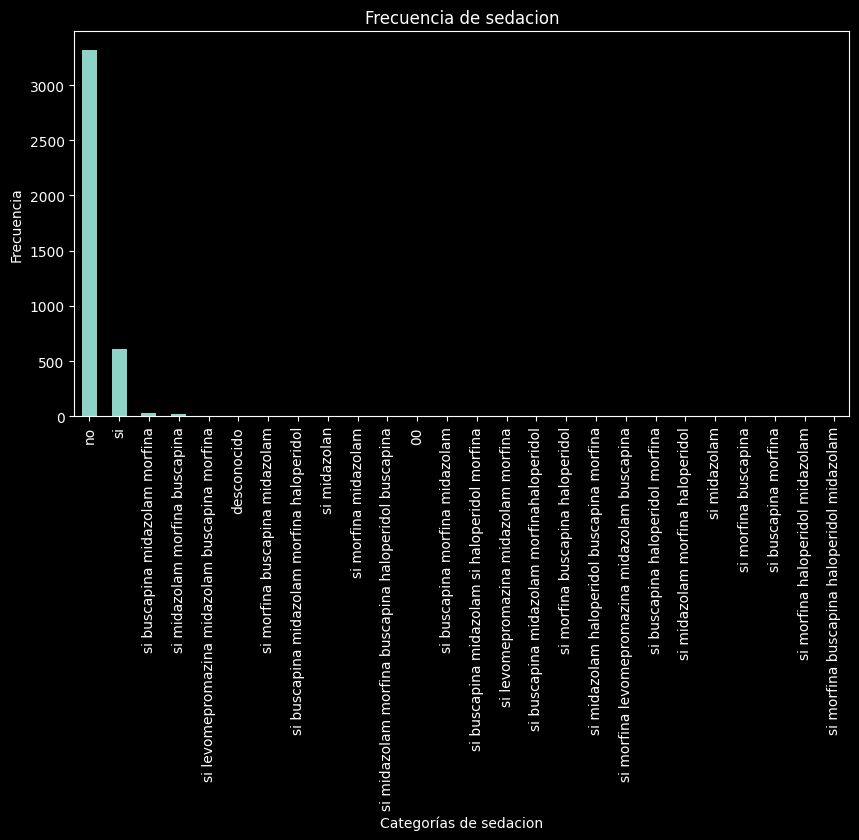

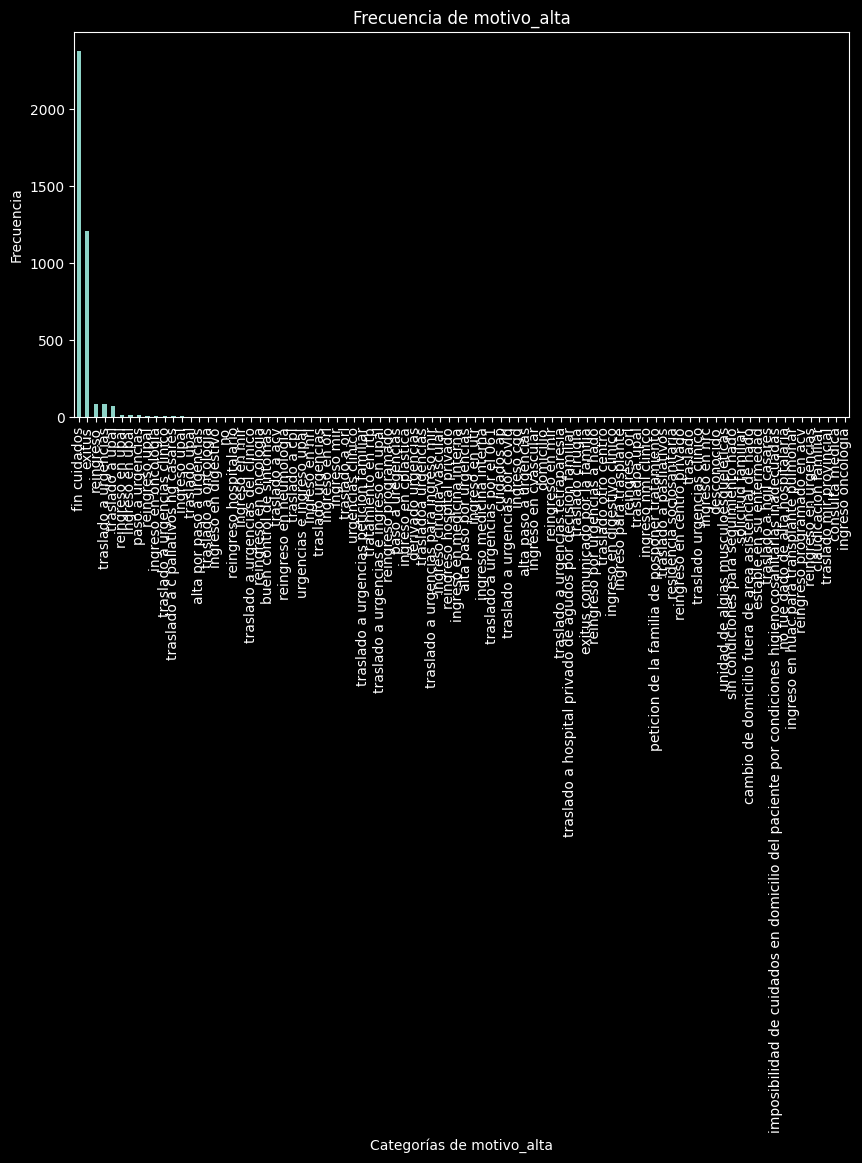

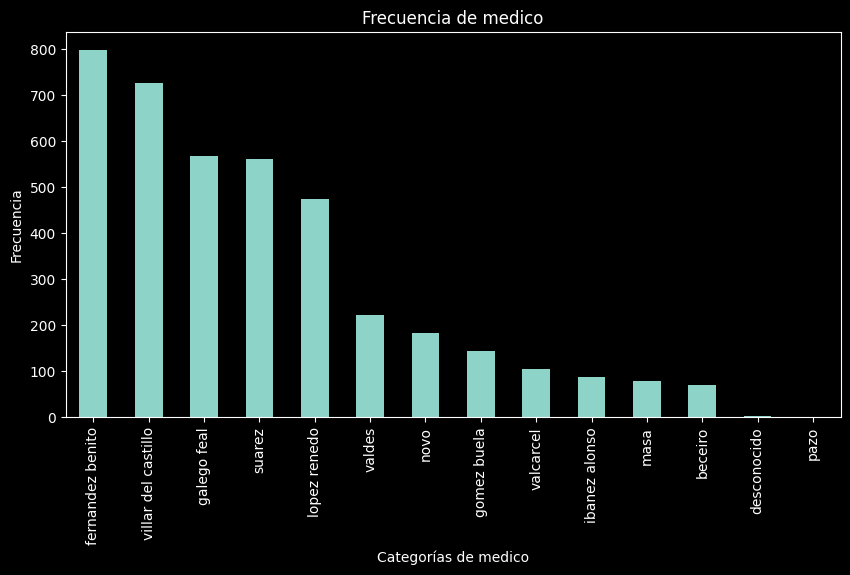

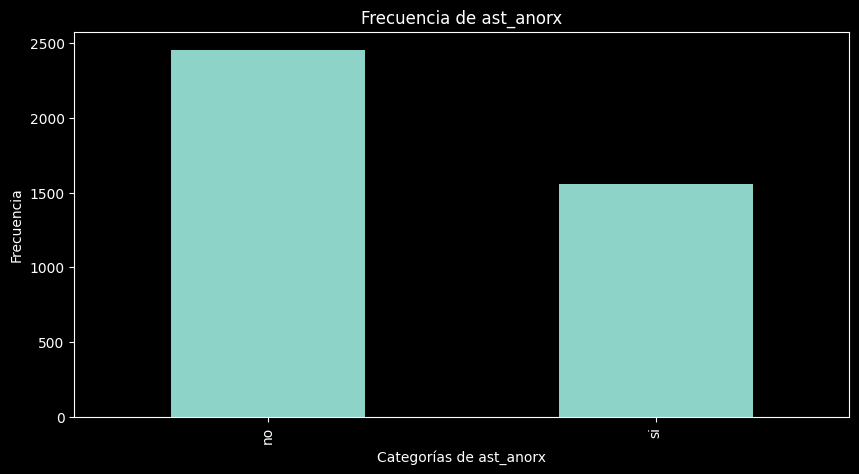

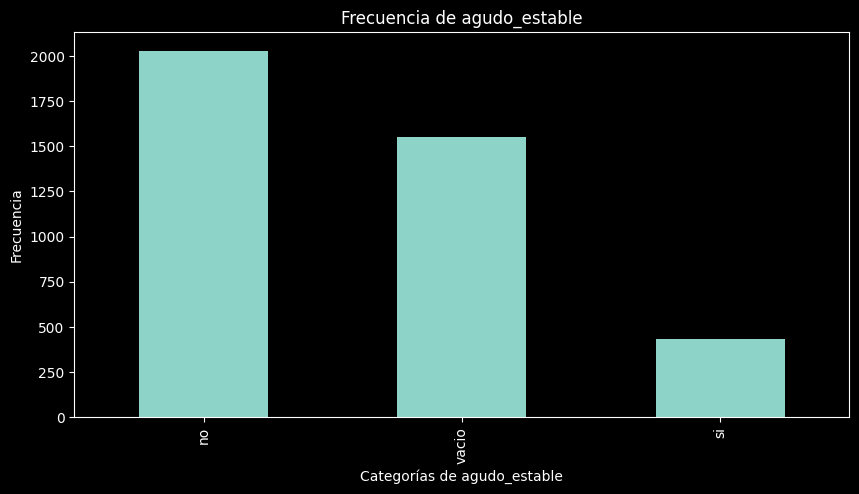

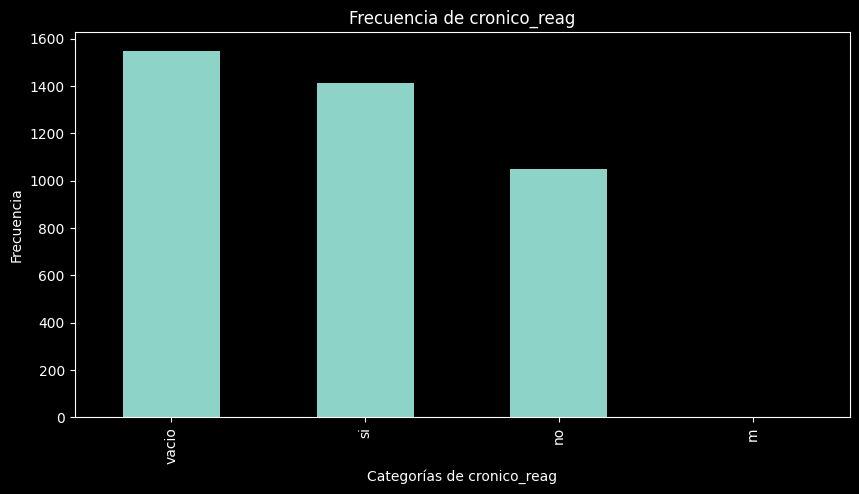

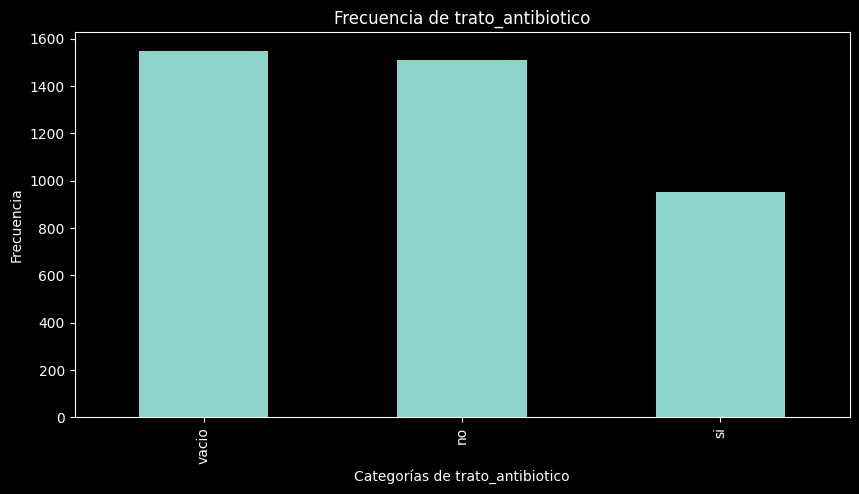

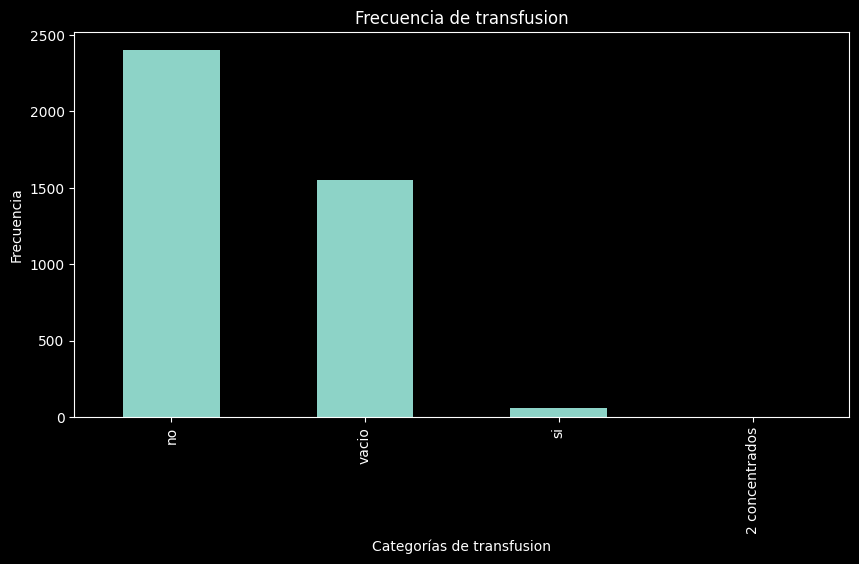

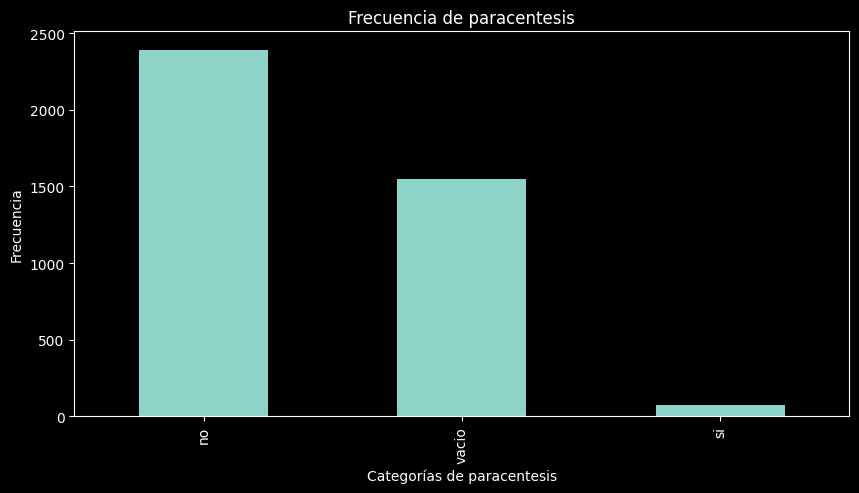

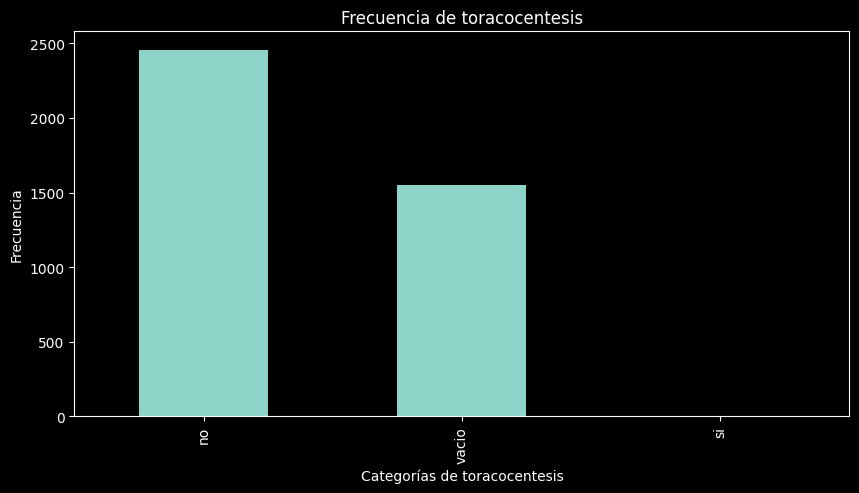

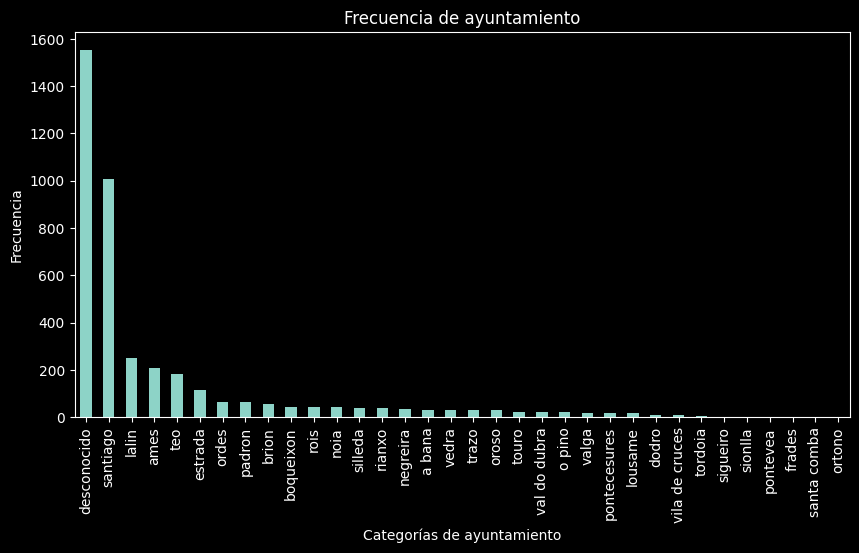

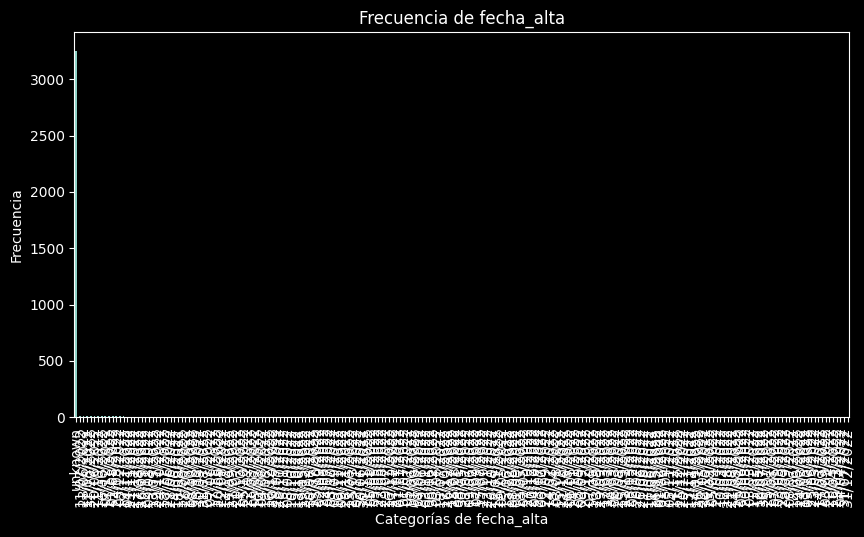

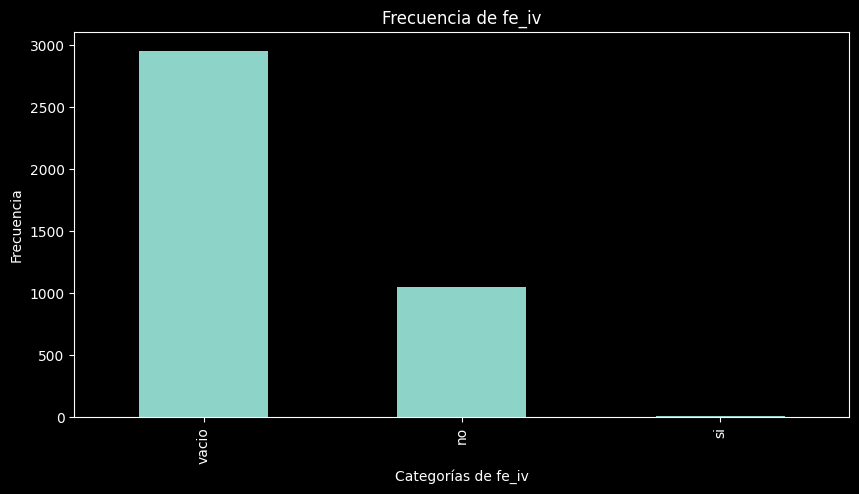

In [51]:
# Lista de columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear un gráfico de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 5))  # Tamaño de la figura
    df[col].value_counts().plot(kind='bar')
    plt.title('Frecuencia de {}'.format(col))
    plt.xlabel('Categorías de {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.show()


## 1.2 Porcentaje de cada categoría

In [52]:
[(col,df[col].value_counts(normalize=True)) for col in df]

[('h_procedencia',
  clinico                 0.558186
  no                      0.311737
  conxo                   0.081984
  gil casares             0.039123
  provincial              0.002990
  chuac                   0.001495
  residencia              0.001246
  si                      0.000748
  rosaleda                0.000748
  hula                    0.000249
  salnes                  0.000249
  ap                      0.000249
  san rafael la coruna    0.000249
  quiron la coruna        0.000249
  lucus augusti           0.000249
  pontevedra              0.000249
  Name: h_procedencia, dtype: float64),
 ('s_procedencia',
  no                              0.305258
  oncologia                       0.134064
  mir                             0.120359
  urgencias                       0.103414
  upal                            0.051832
                                    ...   
  consultas externas oncologia    0.000249
  mir gil                         0.000249
  enfermedad infec

## 1.3 Filtrar por frecuencias:

In [14]:
# for col in df:
#     value_counts = df[col].value_counts()
#     to_remove = value_counts[value_counts <= 5].index
#     df[col].replace(to_remove, np.nan, inplace=True)

## 1.4 Análisis de frecuencia en relación con la variable objetivo:

In [54]:
pd.crosstab(df['h_procedencia'], df['fiebre'])

fiebre                b    no   si  vacio
h_procedencia                            
ap                    0     1    0      0
chuac                 0     6    0      0
clinico               0  1940  299      1
conxo                 0   288   41      0
gil casares           0   141   16      0
hula                  0     0    1      0
lucus augusti         0     1    0      0
no                    1  1079  170      1
pontevedra            0     1    0      0
provincial            0    11    1      0
quiron la coruna      0     0    1      0
residencia            0     5    0      0
rosaleda              0     3    0      0
salnes                0     1    0      0
san rafael la coruna  0     1    0      0
si                    0     2    1      0

In [55]:
for col in df:
    if col != 'diagnostico':
        print(pd.crosstab(df[col], df['diagnostico']))
    else:
        print("You can't crosstab column diagnostico with diagnostico")

diagnostico           ITU (infeccion del tracto urinario)  \
h_procedencia                                               
ap                                                      0   
chuac                                                   1   
clinico                                                98   
conxo                                                  14   
gil casares                                             8   
hula                                                    0   
lucus augusti                                           0   
no                                                     51   
pontevedra                                              0   
provincial                                              0   
quiron la coruna                                        0   
residencia                                              0   
rosaleda                                                0   
salnes                                                  0   
san rafael la coruna    

# 2.Correlation Analysis
Aunque la correlación generalmente se mide entre variables numéricas, también puedes medir la correlación entre variables categóricas utilizando el coeficiente de correlación de Cramér.

In [93]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df['h_procedencia'], df['s_procedencia'])


0.42913307515494187

In [94]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_columns = df.select_dtypes(include=['object']).columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


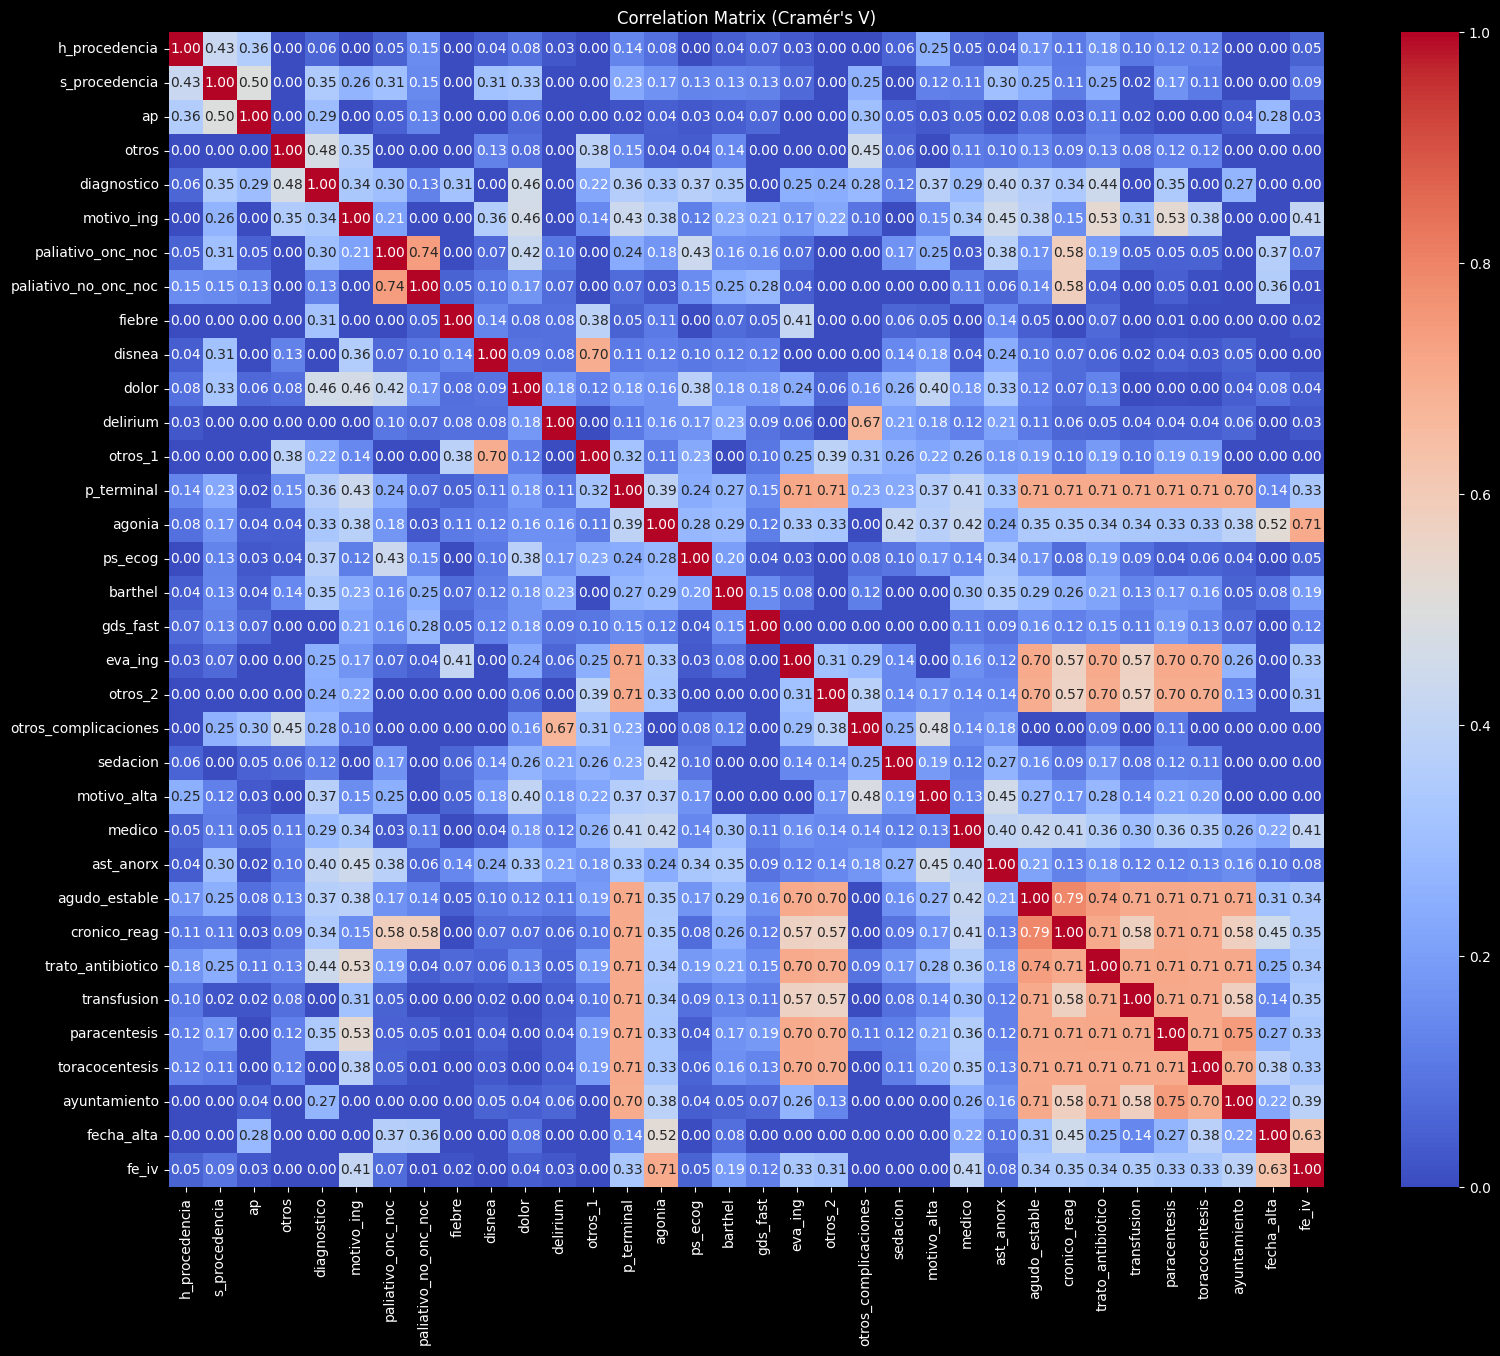

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Cramér\'s V)')
plt.show()

# 3.Codificación One-hot
Este es un proceso mediante el cual las variables categóricas se convierten en una forma que podría ser proporcionada a los algoritmos de machine learning para hacer un mejor trabajo en la predicción. Por ejemplo:
```python
df_dummies = pd.get_dummies(df, columns=['h_procedencia', 's_procedencia'])
```

# 4.Feature Hashing

Esta es una técnica inteligente para codificar categorías en un número limitado de dimensiones. Cuando la cardinalidad (número de valores únicos) es muy alta, one-hot encoding puede aumentar la dimensionalidad demasiado y puede causar problemas de memoria. El hashing trick proporciona una solución a este problema.

In [18]:
from sklearn.feature_extraction import FeatureHasher

# Número de características que quieres después de la transformación
n_features = 10

# Crear el hasher
hasher = FeatureHasher(n_features=n_features, input_type='string')

# Aplicar la transformación a las columnas deseadas
hashed_features = hasher.transform(df['diagnostico'].str.split().values)

# Convertir a DataFrame
hashed_features = pd.DataFrame(hashed_features.toarray())

hashed_features

0    1    2    3    4    5    6    7    8    9
0     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
2     0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0 -2.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
4008  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -2.0  0.0  2.0
4009  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0
4010  0.0  0.0  0.0 -1.0  0.0  0.0 -1.0  0.0  0.0  0.0
4011  0.0  0.0 -1.0  0.0  0.0  0.0  1.0  0.0 -1.0  0.0
4012  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

[4013 rows x 10 columns]

In [19]:
df_hashed = df.copy()

df_hashed = df_hashed.drop(columns=['diagnostico'])

df_hashed = pd.concat([df_hashed, hashed_features], axis=1)

df_hashed.head()

h_procedencia s_procedencia  ap                             otros  \
0   gil casares          upal  no   reingreso en urgencias no no no   
1       clinico     oncologia  no  met pulmonares y digest no no no   
2       clinico           mir  no                       no no no no   
3       clinico     digestivo  no                       no no no no   
4       clinico     urgencias  no                       no no no no   

                  motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0           control sintomas                si                   si     no   
1          mal control dolor                si                   no     no   
2          control evolutivo                si                   si     no   
3  administracion octreotido                no                   no     no   
4           control sintomas                si                   no     no   

  disnea dolor  ...    0    1    2    3    4    5    6    7    8    9  
0     no    si  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
1     no    si  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  
2     si    no  ...  0.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
3     no    no  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  
4     si    si  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0 -2.0  1.0  1.0  

[5 rows x 43 columns]

# 5.Encoding Categorical Data

* We can not load our Machine Learning Model with Categorical Data because ML Models can not understand String Data
  
* We must use technique to encode the Categorical Columns. there are many Techniques : LabelEncoding, One-hot-Encoding, TargetMeanEncoding and many more.
  
* We will Encode the Categorical Columns on the Basis of the Frequency distribution (Cardinality)
* We Use One-hot-Encoding for low Cardinality Columns and will use LabelEncoding for High Cardinality Columns.
* One-hot-Encoding: it is a type of encoding in which we create new columns with the values of that categorical column and assign 1 for yes and 0 for no. Like Column Side have two values S and P. it will create two columns S and P and then assign 1 and 0 in S and also Same for P.
* LabelEncoding: it is used when we have high cardinality column because if we have column which have 2000 different unique values in string, then we can not use one-hot-encoding beacause it will create 2000 columns which will be harder for us. so, we use LabelEncoding which encode on that column in which we are working on. it will assign numbers to every unique string in that particular column.

In [ ]:
le = LabelEncoder()

print(pd.get_dummies(cat_data['']))
print(le.fit_transform(cat_data['']))


# 6.Lazy Predict

In [56]:
import lazypredict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [57]:
df = catalog.load("hado_model")

[08/17/23 18:20:36] INFO     Loading data from 'hado_model' (CSVDataSet)...                     data_catalog.py:345

In [66]:
df.columns

Index(['source_hospital', 's_procedencia', 'diagnostico', 'motivo_ing',
       'motivo_alta', 'ap', 'n_estancias', 'n_visitas', 'paliativo_onc_noc',
       'paliativo_no_onc_noc', 'fiebre', 'disnea', 'dolor', 'delirium',
       'p_terminal', 'agonia', 'ast_anorx', 'cronico_reag',
       'trato_antibiotico', 'transfusion', 'paracentesis', 'agudo_estable',
       'toracocentesis', 'fe_iv', 'ps_ecog', 'barthel', 'gds_fast', 'eva_ing',
       'otros_complicaciones', 'otros', 'otros_1', 'otros_2', 'tiene_sedacion',
       'morfina', 'midazolam', 'buscapina', 'haloperidol', 'levomepromazina',
       'year'],
      dtype='object')

In [68]:
# Creating our target variable
target = 'source_hospital'
y = df[target]
X = df.drop(columns=target)
                     
# Splitting our data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
classifiers = LazyClassifier(ignore_warnings=True, custom_metric=None)
models,predictions = classifiers.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:02<00:00, 10.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 3210, number of used features: 34
[LightGBM] [Info] Start training from score -1.159295
[LightGBM] [Info] Start training from score -0.382826
[LightGBM] [Info] Start training from score -5.434969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

# Interpretación de los modelos:
A partir de los resultados, el **LGBMClassifier**, **ExtraTreesClassifier**, **BaggingClassifier** y **RandomForestClassifier** están liderando en términos de ***precisión*** y ***F1 Score***. Sin embargo, es importante notar que el equilibrio entre clases puede afectar estos valores. Es por eso que es **crucial no depender únicamente de la precisión**, sino **también considerar otras métricas**, especialmente si se está tratando con **clases desbalanceadas**.

# RandomForestClassifier

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [70]:
target = 'source_hospital'
y = df[target]
X = df.drop(columns=target)
                     
# Splitting our data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [71]:
# Entrenar el RandomForestClassifier:

# Crear el clasificador
clf = RandomForestClassifier(random_state=42)

# Entrenar el clasificador
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
# Evaluar el modelo:

# Predicciones
y_pred = clf.predict(X_test)

# Medir la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 98.13%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       244
           1       0.98      0.99      0.99       557
           3       0.00      0.00      0.00         2

    accuracy                           0.98       803
   macro avg       0.65      0.65      0.65       803
weighted avg       0.98      0.98      0.98       803



El rendimiento del modelo RandomForest puede mejorarse ajustando sus parámetros, como **n_estimators**, **max_depth**, **min_samples_split**, entre otros. Pueden usarse técnicas como búsqueda en cuadrícula (**GridSearchCV**) para encontrar la combinación óptima de parámetros.

In [73]:
# Importar las bibliotecas necesarias:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [74]:
# Preparar los datos:

target = 'source_hospital'
y = df[target]
X = df.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Configurar el GridSearchCV:

# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el clasificador
clf = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
# n_jobs=-1 permite que se utilicen todos los núcleos de la CPU para acelerar el proceso.

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [78]:
# Evaluar el modelo con los mejores parámetros:

# Usar el mejor modelo encontrado por GridSearchCV
best_clf = grid_search.best_estimator_

# Predicciones
y_pred = best_clf.predict(X_test)

# Medir la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print(report)

# Ver los mejores parámetros
print("Best Parameters:", grid_search.best_params_)

Accuracy: 98.26%
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       244
           1       0.98      0.99      0.99       557
           3       0.00      0.00      0.00         2

    accuracy                           0.98       803
   macro avg       0.66      0.65      0.65       803
weighted avg       0.98      0.98      0.98       803

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [86]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": best_clf.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

feature  importance
0          s_procedencia        0.44
4                     ap        0.39
5            n_estancias        0.03
6              n_visitas        0.03
2             motivo_ing        0.02
8   paliativo_no_onc_noc        0.01
24               barthel        0.01
25              gds_fast        0.01
1            diagnostico        0.01
37                  year        0.01
3            motivo_alta        0.00
28                 otros        0.00
23               ps_ecog        0.00
17     trato_antibiotico        0.00
27  otros_complicaciones        0.00
7      paliativo_onc_noc        0.00
10                disnea        0.00
29               otros_1        0.00
30               otros_2        0.00
15             ast_anorx        0.00
11                 dolor        0.00
12              delirium        0.00
16          cronico_reag        0.00
9                 fiebre        0.00
31        tiene_sedacion        0.00
14                agonia        0.00
13            p_terminal        0.00
20         agudo_estable        0.00
26               eva_ing        0.00
19          paracentesis        0.00
18           transfusion        0.00
34             buscapina        0.00
33             midazolam        0.00
32               morfina        0.00
22                 fe_iv        0.00
36       levomepromazina        0.00
35           haloperidol        0.00
21        toracocentesis        0.00

# Proceso de RandomForestClassifier para valores discretos y RandomForestRegressor para valores continuos

In [87]:
# dividir los datos en características de entrada y de destino

X = df.drop("diagnostico", axis=1)
y = df["diagnostico"]

# Estandarización del conjunto de datos

In [88]:
# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Dividiendo el conjunto de datos en datos de entrenamiento y prueba

# dividir en conjunto de entrenamiento (train) y 
#conjunto de prueba (test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
    )

In [93]:
# Construyendo el Clasificador de bosque aleatorio
from sklearn.ensemble import RandomForestRegressor

# crear el clasificador
regressor = RandomForestRegressor(n_estimators=100)

# Entrenar el modelo usando el conjunto de entranamiento
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
# Después del entrenamiento, podemos realizar predicciones sobre los datos de la prueba.
# predicción en el conjunto de prueba
y_pred = regressor.predict(X_test)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Es equivalente a sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.0001
RMSE: 0.0107
MAE: 0.0073
R^2: 0.1314


In [97]:
# Identificar características importantes
# verificar características importantes

feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": regressor.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df


feature  importance
5            n_estancias        0.13
1          s_procedencia        0.12
2             motivo_ing        0.10
24               barthel        0.10
6              n_visitas        0.09
17     trato_antibiotico        0.07
25              gds_fast        0.06
37                  year        0.05
23               ps_ecog        0.03
11                 dolor        0.03
7      paliativo_onc_noc        0.03
10                disnea        0.02
3            motivo_alta        0.02
15             ast_anorx        0.02
9                 fiebre        0.02
8   paliativo_no_onc_noc        0.02
12              delirium        0.01
16          cronico_reag        0.01
27  otros_complicaciones        0.01
29               otros_1        0.01
20         agudo_estable        0.01
4                     ap        0.01
0        source_hospital        0.01
30               otros_2        0.01
31        tiene_sedacion        0.01
14                agonia        0.00
28                 otros        0.00
13            p_terminal        0.00
18           transfusion        0.00
19          paracentesis        0.00
26               eva_ing        0.00
22                 fe_iv        0.00
21        toracocentesis        0.00
33             midazolam        0.00
34             buscapina        0.00
32               morfina        0.00
36       levomepromazina        0.00
35           haloperidol        0.00

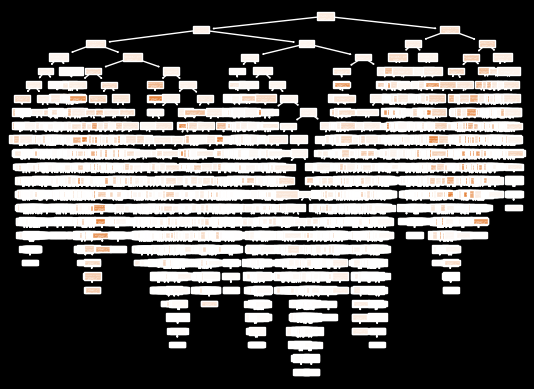

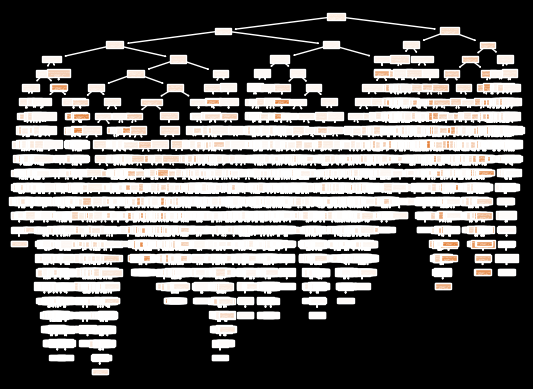

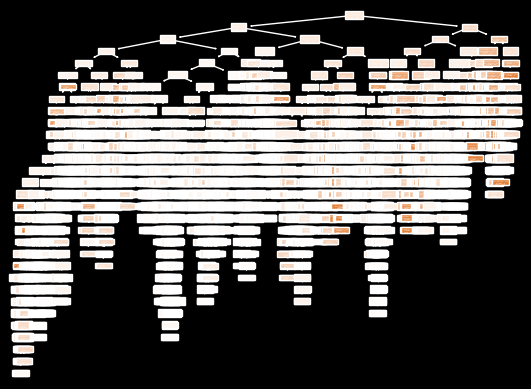

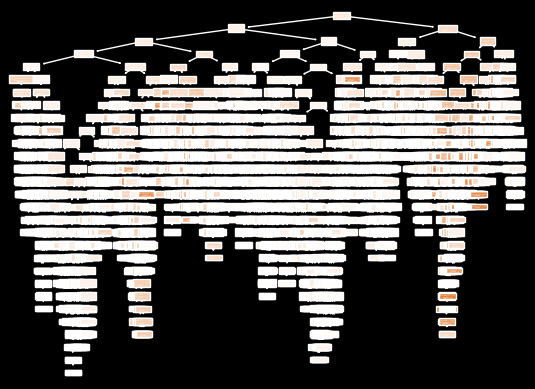

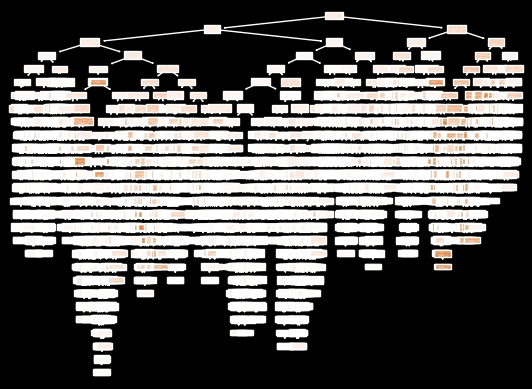

In [100]:
from sklearn import tree

num_trees_to_visualize = 5

for i in range(num_trees_to_visualize):
    tree.plot_tree(regressor.estimators_[i], feature_names=df.columns, filled=True)
    plt.show()

In [84]:
bosque = RandomForestClassifier(n_estimators=20,
                                criterion='gini',
                                max_features="sqrt",
                                bootstrap=True,
                                max_samples=2/3,
                                oob_score=True)
bosque.fit(X_train, y_train)

# print(bosque.predict())
# print(bosque.score())
print(bosque.oob_score_)


0.9850467289719627


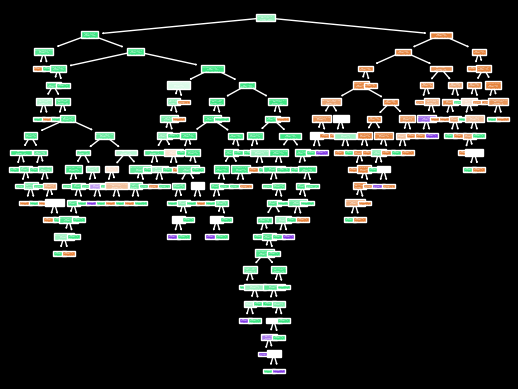

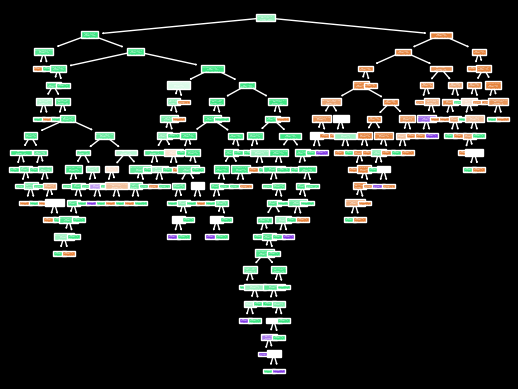

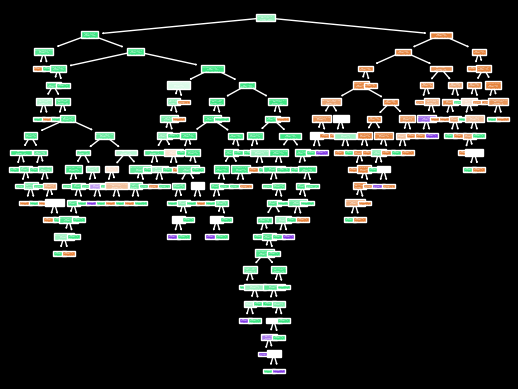

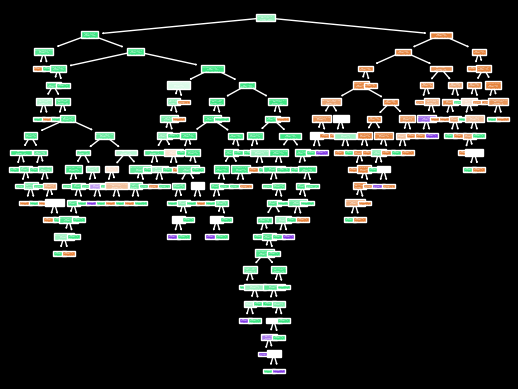

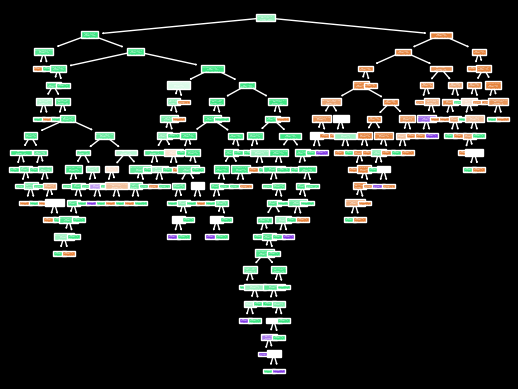

In [101]:
from sklearn import tree

num_trees_to_visualize = 5

for arbol in range(num_trees_to_visualize):
    tree.plot_tree(best_clf.estimators_[i], feature_names=df.columns, filled=True)
    plt.show()

# XGBoost

In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [110]:
# Preparación de datos:

target = 'diagnostico'
y = df[target]
X = df.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Creación y entrenamiento del modelo:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_model.fit(X_train, y_train)
# Para un problema de regresión xgb.XGBRegressor()

# Si trabajamos con un problema de clasificación, utilizar xgb.XGBClassifier() en su lugar.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [112]:
# Predicción

y_pred = xgb_model.predict(X_test)

In [113]:
# Evaluación del modelo:

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Es equivalente a sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.0001
RMSE: 0.0098
MAE: 0.0069
R^2: 0.1948


# Ajuste de hiperparámetros (opcional): 

* Algunos de los hiperparámetros más comunes incluyen: `learning_rate`, `max_depth`, `subsample`, `colsample_bytree`, y `n_estimators`.
  
Para encontrar la mejor combinación de hiperparámetros, a menudo se utiliza:
* **Validación cruzada**
* **GridSearchCV** 
* **RandomizedSearchCV**


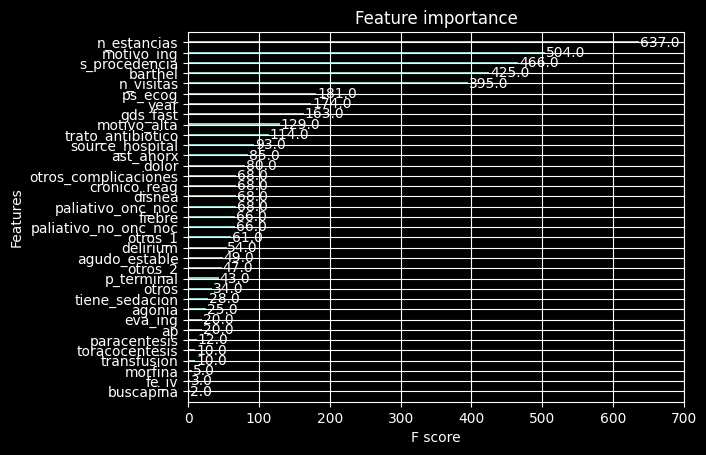

In [114]:
# Importancia de las características (opcional):

xgb.plot_importance(xgb_model)
plt.show()

In [116]:
# Preparación de datos:

target = 'ap'
y = df[target]
X = df.drop(columns=target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective ='reg:squarederror')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluación del modelo:

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Es equivalente a sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.0212
RMSE: 0.1455
MAE: 0.0212
R^2: 0.8980


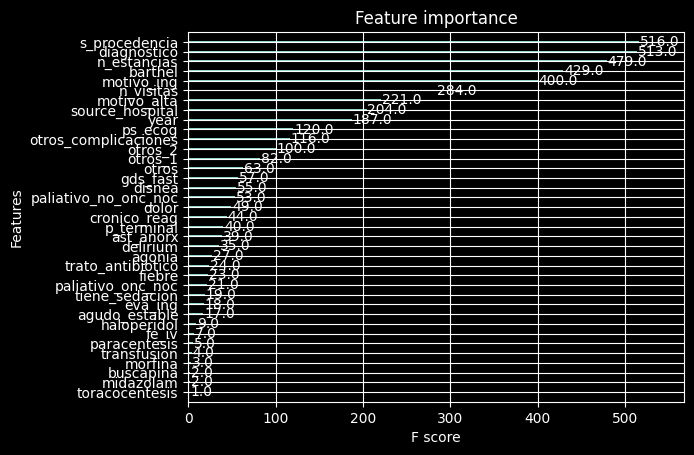

In [117]:
# Importancia de las características (opcional):

xgb.plot_importance(xgb_model)
plt.show()